# Phase 3: Analysis Questions (v3)

**Structure:**
1. Univariate Analysis
2. Bivariate Analysis (8 Business Questions)
3. **Deep Dive: Stops, Duration & Price Relationship (NEW)**
4. Correlation Analysis
5. Summary & Key Insights

**Business Questions:**
- Q1: How does number of stops affect price?
- Q2: Which airlines are premium vs budget?
- Q3: What is the relationship between duration and price?
- Q4: How do departure times influence price?
- Q5: Which routes are most/least expensive?
- Q6: Does day of week affect price?
- Q7: Does month affect price?
- Q8: Which airline offers best value for non-stop flights?

## 3.1 Import Libraries & Setup

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')

TITLE_SIZE = 16
AXIS_LABEL_SIZE = 13
TICK_SIZE = 11
LEGEND_SIZE = 11
ANNOTATION_SIZE = 11
LINE_WIDTH = 2.5
BAR_EDGE_WIDTH = 1.5
BOX_LINE_WIDTH = 1.5

COLOR_GOOD = '#2ecc71'
COLOR_BAD = '#e74c3c'
COLOR_NEUTRAL = '#3498db'
COLOR_MEAN = '#e74c3c'
COLOR_MEDIAN = '#27ae60'

sns.set_palette('Set2')

In [118]:
def add_conclusion_box(ax, text, loc='upper left'):
    if loc == 'upper left':
        x, y, va, ha = 0.02, 0.98, 'top', 'left'
    elif loc == 'upper right':
        x, y, va, ha = 0.98, 0.98, 'top', 'right'
    elif loc == 'lower left':
        x, y, va, ha = 0.02, 0.02, 'bottom', 'left'
    else:
        x, y, va, ha = 0.98, 0.02, 'bottom', 'right'
    
    ax.text(x, y, text, transform=ax.transAxes, fontsize=ANNOTATION_SIZE,
            verticalalignment=va, horizontalalignment=ha,
            bbox=dict(boxstyle='round', facecolor='lightyellow', 
                     alpha=0.9, edgecolor='gray', linewidth=1))

def style_axis(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=TITLE_SIZE, fontweight='bold', pad=15)
    ax.set_xlabel(xlabel, fontsize=AXIS_LABEL_SIZE)
    ax.set_ylabel(ylabel, fontsize=AXIS_LABEL_SIZE)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    sns.despine(ax=ax)

In [119]:
df = pd.read_csv('D:/Courses/DL INTERNSHIP/SECOND PROJECT/project_structure/data/processed/flight_data_cleaned.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (10363, 15)


,Airline,Source,Destination,Additional_Info,Price,Duration_Minutes,Stops,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Route_Pair
0,IndiGo,Banglore,New Delhi,No info,3897,170,0,24,3,6,22,20,1,10,Banglore_New Delhi
1,Air India,Kolkata,Banglore,No info,7662,445,2,1,5,2,5,50,13,15,Kolkata_Banglore
2,Jet Airways,Delhi,Cochin,No info,13882,1140,2,9,6,6,9,25,4,25,Delhi_Cochin
3,IndiGo,Kolkata,Banglore,No info,6218,325,1,12,5,6,18,5,23,30,Kolkata_Banglore
4,IndiGo,Banglore,New Delhi,No info,13302,285,1,1,3,4,16,50,21,35,Banglore_New Delhi


---
## 3.2 Univariate Analysis

### 3.2.1 Target Variable: Price

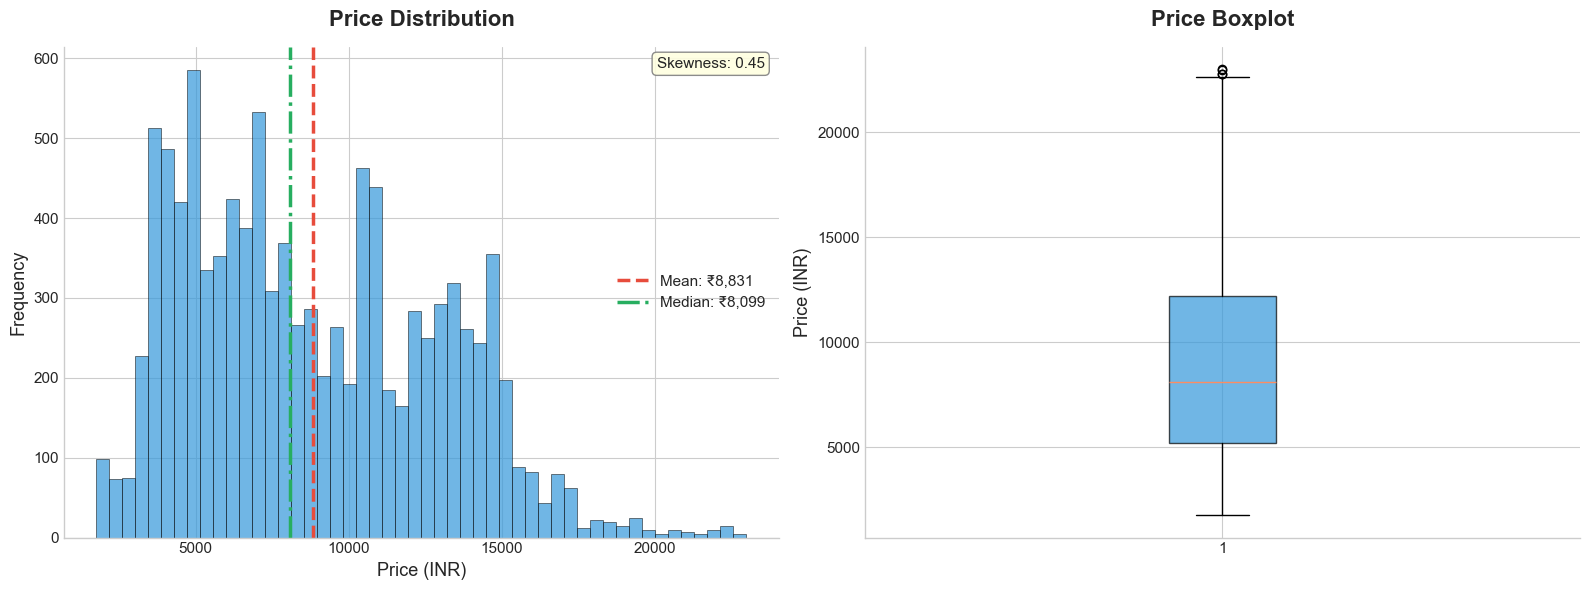

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]
ax.hist(df['Price'], bins=50, edgecolor='black', linewidth=0.5, color=COLOR_NEUTRAL, alpha=0.7)
ax.axvline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH, 
           label=f"Mean: ₹{df['Price'].mean():,.0f}")
ax.axvline(df['Price'].median(), color=COLOR_MEDIAN, linestyle='-.', linewidth=LINE_WIDTH, 
           label=f"Median: ₹{df['Price'].median():,.0f}")
style_axis(ax, 'Price Distribution', 'Price (INR)', 'Frequency')
ax.legend(fontsize=LEGEND_SIZE)
add_conclusion_box(ax, f"Skewness: {df['Price'].skew():.2f}", 'upper right')

ax = axes[1]
bp = ax.boxplot(df['Price'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor(COLOR_NEUTRAL)
bp['boxes'][0].set_alpha(0.7)
style_axis(ax, 'Price Boxplot', '', 'Price (INR)')

plt.tight_layout()
plt.show()

### 3.2.2 Numerical Features

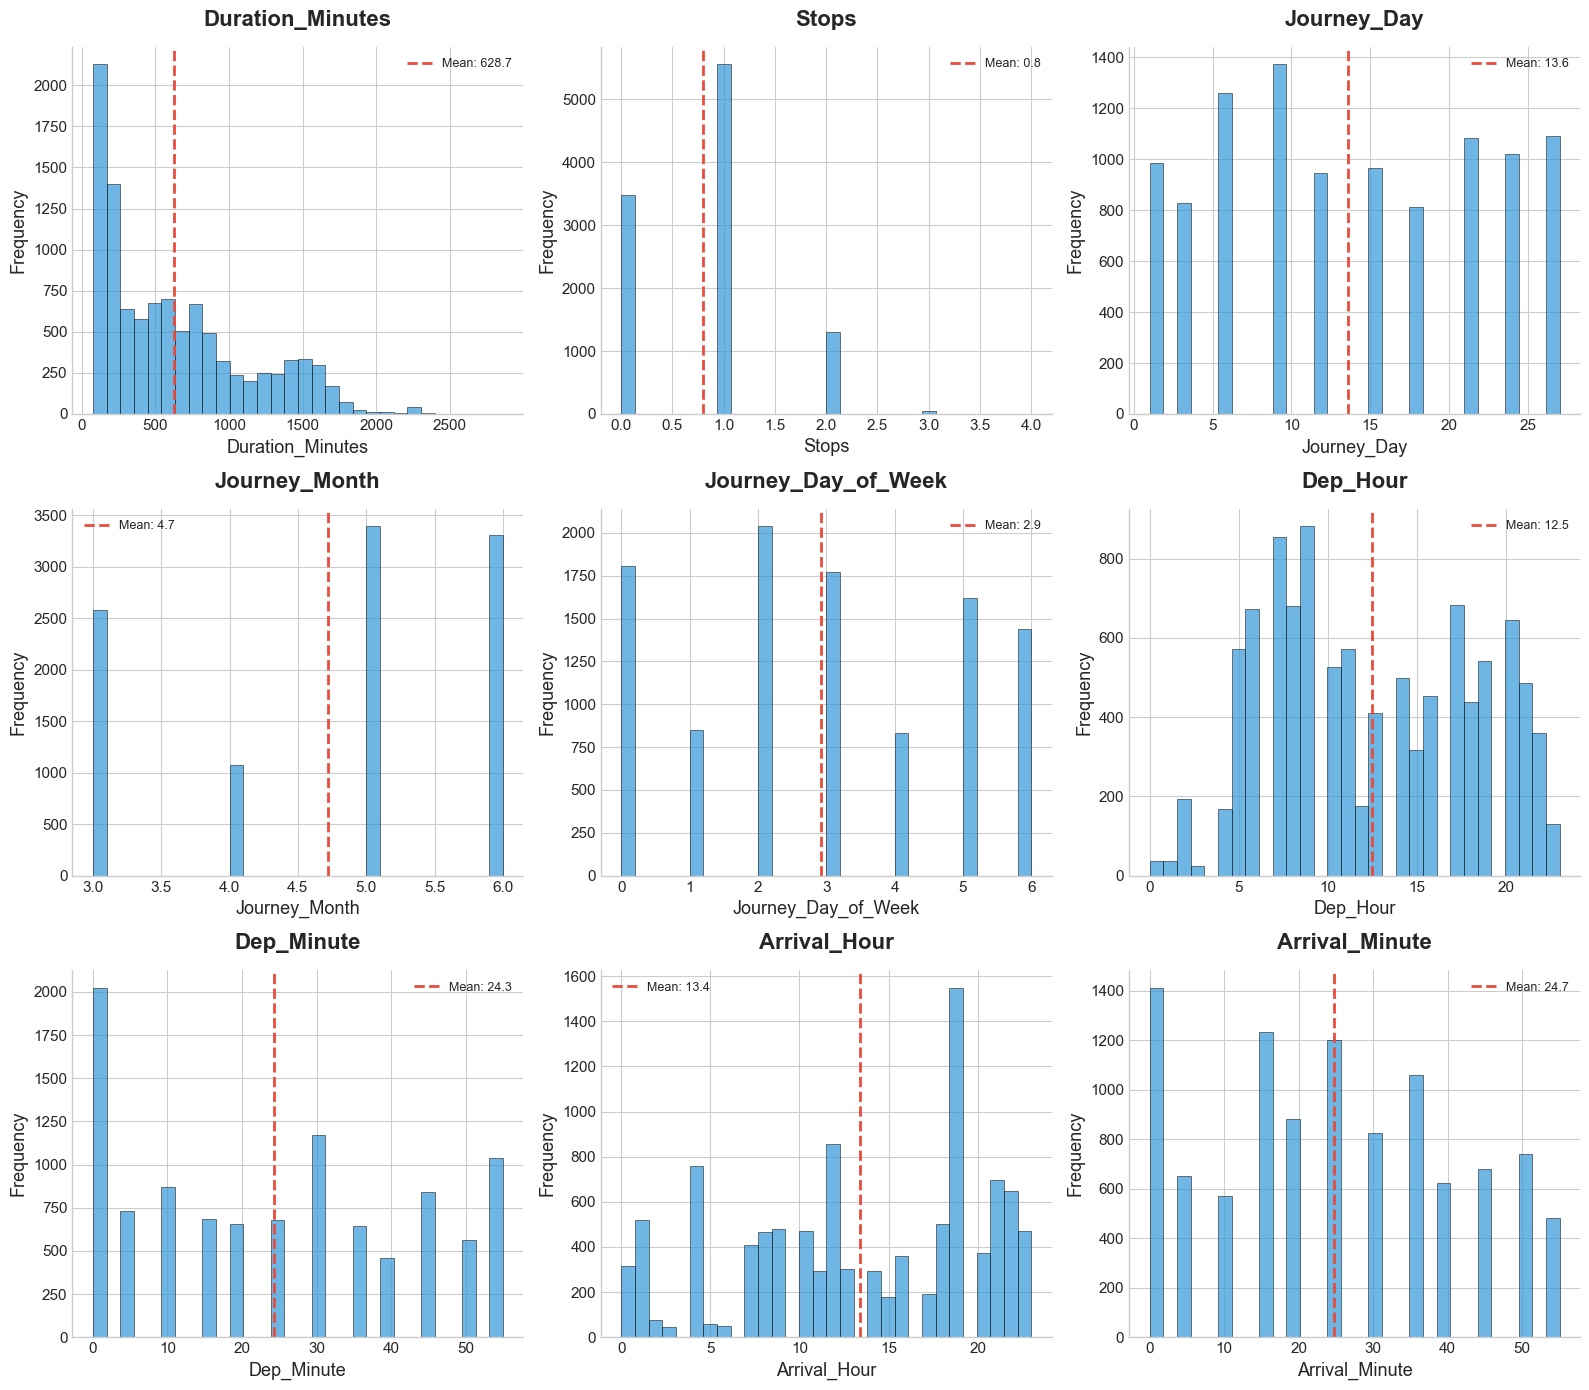

In [121]:
numerical_cols = ['Duration_Minutes', 'Stops', 'Journey_Day', 'Journey_Month', 
                  'Journey_Day_of_Week', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute']

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    ax.hist(df[col], bins=30, edgecolor='black', linewidth=0.5, color=COLOR_NEUTRAL, alpha=0.7)
    ax.axvline(df[col].mean(), color=COLOR_MEAN, linestyle='--', linewidth=2, 
               label=f"Mean: {df[col].mean():.1f}")
    style_axis(ax, col, col, 'Frequency')
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

### 3.2.3 Categorical Features

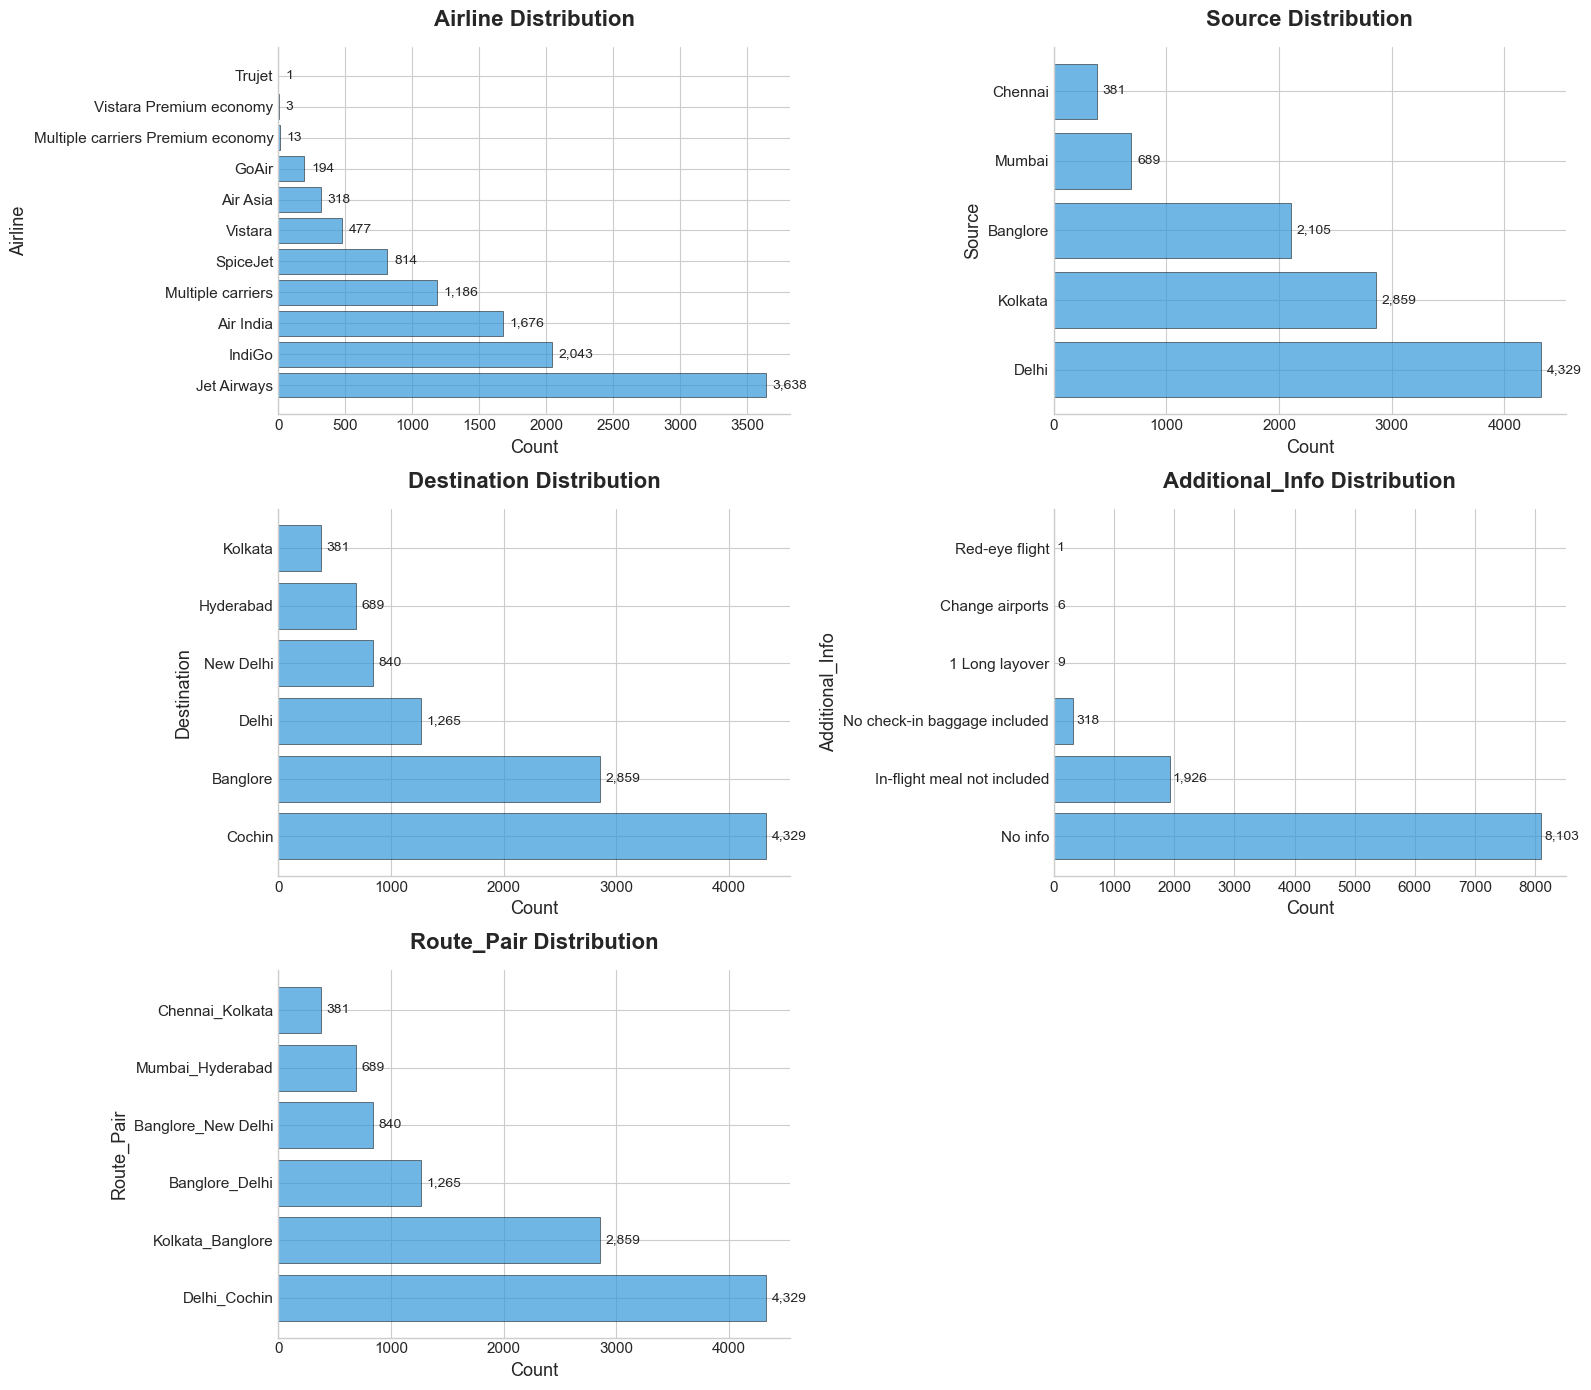

In [122]:
categorical_cols = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Route_Pair']

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    value_counts = df[col].value_counts()
    bars = ax.barh(value_counts.index, value_counts.values, edgecolor='black', 
                   linewidth=0.5, color=COLOR_NEUTRAL, alpha=0.7)
    style_axis(ax, f'{col} Distribution', 'Count', col)
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 50, bar.get_y() + bar.get_height()/2., 
                f'{int(width):,}', va='center', fontsize=TICK_SIZE-1)

axes[5].axis('off')
plt.tight_layout()
plt.show()

---
## 3.3 Bivariate Analysis (Business Questions)

### Q1: How does the number of stops affect flight prices?

In [123]:
stops_stats = df.groupby('Stops')['Price'].agg(['mean', 'median', 'count', 'std']).round(0)
stops_stats

,mean,median,count,std
Stops,,,,
0,4998.0,4667.0,3470,1966.0
1,10322.0,10262.0,5550,3419.0
2,12547.0,12723.0,1299,2867.0
3,13261.0,13007.0,43,2943.0
4,17686.0,17686.0,1,NaN


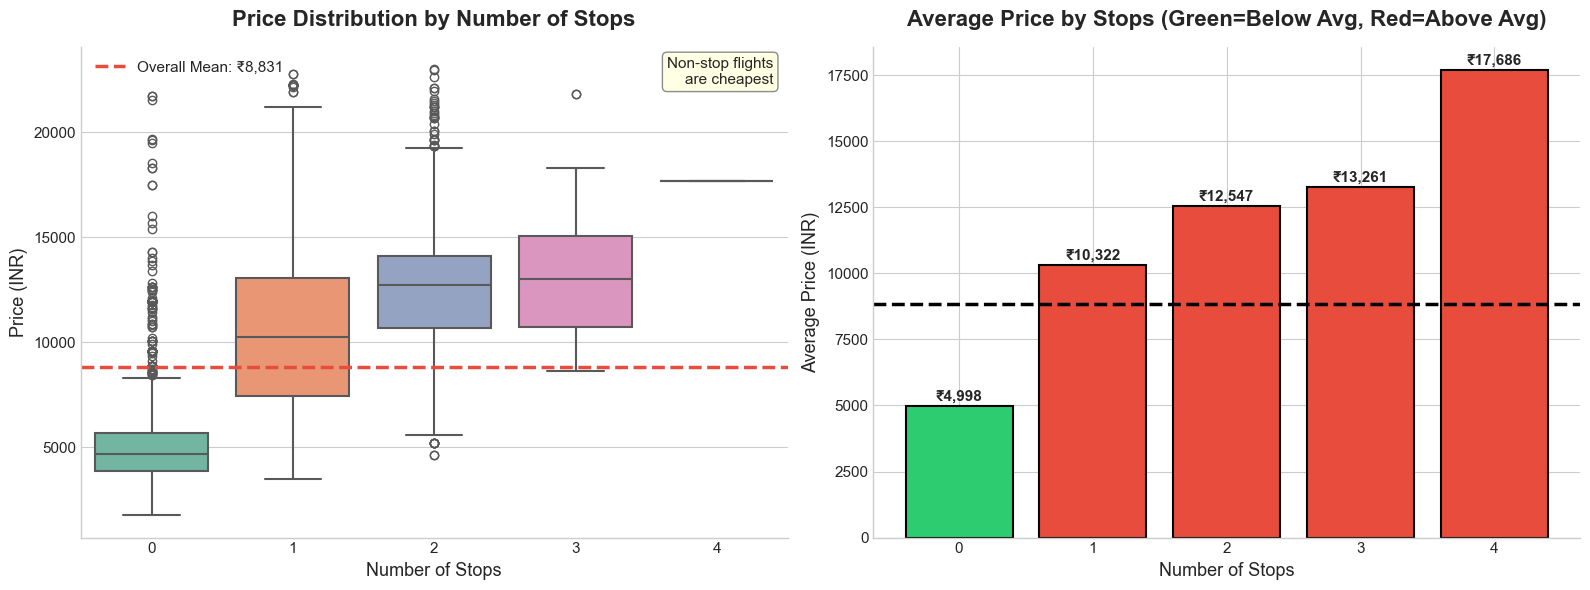

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]
sns.boxplot(x='Stops', y='Price', data=df, ax=ax, linewidth=BOX_LINE_WIDTH, 
            palette='Set2', hue='Stops', legend=False)
ax.axhline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH, 
           label=f"Overall Mean: ₹{df['Price'].mean():,.0f}")
style_axis(ax, 'Price Distribution by Number of Stops', 'Number of Stops', 'Price (INR)')
ax.legend(fontsize=LEGEND_SIZE)
add_conclusion_box(ax, "Non-stop flights\nare cheapest", 'upper right')

ax = axes[1]
mean_by_stops = df.groupby('Stops')['Price'].mean().sort_index()
colors = [COLOR_GOOD if x < df['Price'].mean() else COLOR_BAD for x in mean_by_stops.values]
bars = ax.bar(mean_by_stops.index, mean_by_stops.values, color=colors, 
              edgecolor='black', linewidth=BAR_EDGE_WIDTH)
ax.axhline(df['Price'].mean(), color='black', linestyle='--', linewidth=LINE_WIDTH)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 200, 
            f'₹{height:,.0f}', ha='center', fontsize=ANNOTATION_SIZE, fontweight='bold')

style_axis(ax, 'Average Price by Stops (Green=Below Avg, Red=Above Avg)', 
           'Number of Stops', 'Average Price (INR)')

plt.tight_layout()
plt.show()

### Q2: Which airlines command premium pricing and which are budget-friendly?

In [125]:
airline_stats = df.groupby('Airline')['Price'].agg(['mean', 'median', 'count']).round(0)
airline_stats = airline_stats.sort_values('mean', ascending=False)
airline_stats

,mean,median,count
Airline,,,
Multiple carriers Premium economy,11419.0,11269.0,13
Jet Airways,11303.0,11087.0,3638
Multiple carriers,10751.0,10197.0,1186
Air India,9391.0,9174.0,1676
Vistara Premium economy,8962.0,9125.0,3
Vistara,7802.0,7980.0,477
GoAir,5861.0,5135.0,194
IndiGo,5668.0,5000.0,2043
Air Asia,5594.0,5162.0,318


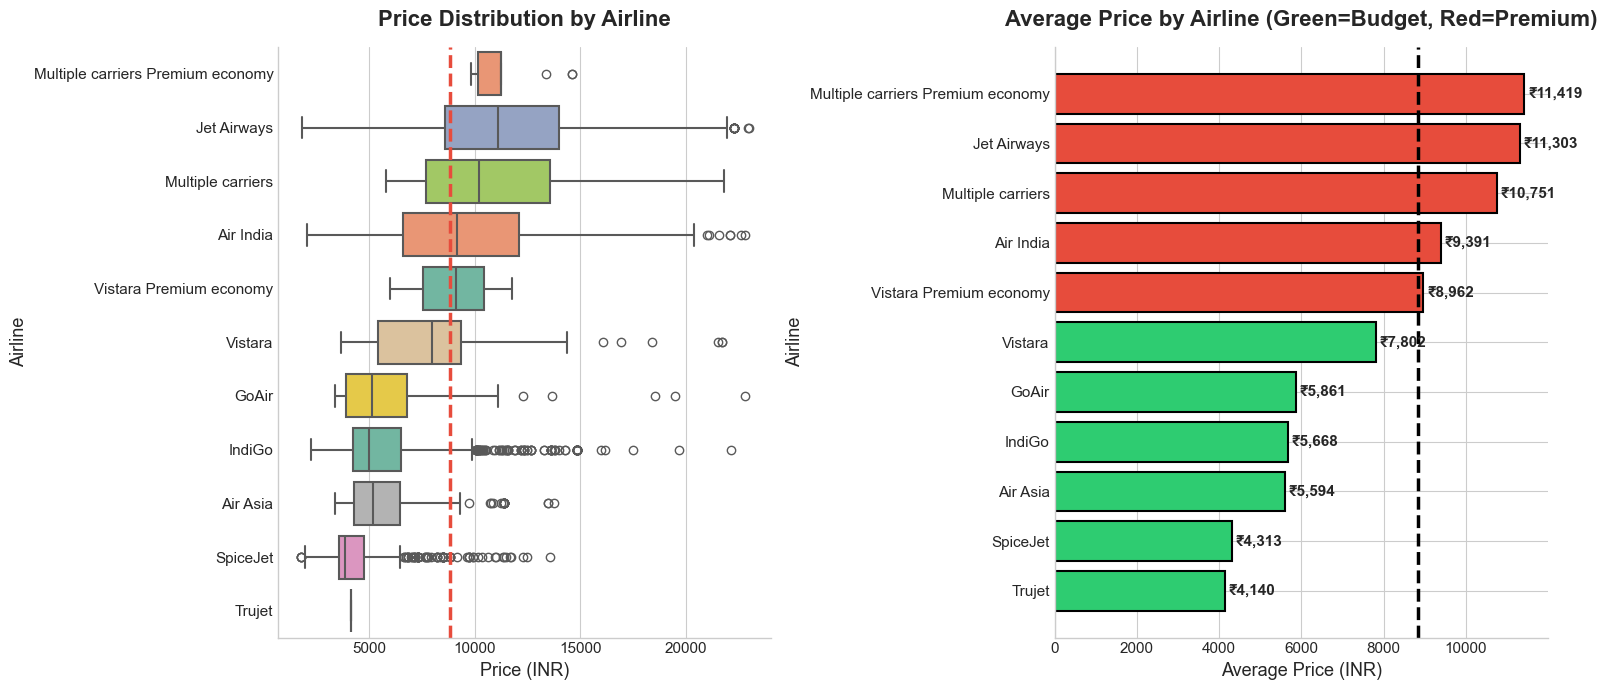

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

ax = axes[0]
order = df.groupby('Airline')['Price'].mean().sort_values(ascending=False).index
sns.boxplot(x='Price', y='Airline', data=df, order=order, ax=ax, 
            linewidth=BOX_LINE_WIDTH, palette='Set2', hue='Airline', legend=False)
ax.axvline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH)
style_axis(ax, 'Price Distribution by Airline', 'Price (INR)', 'Airline')

ax = axes[1]
mean_by_airline = df.groupby('Airline')['Price'].mean().sort_values(ascending=True)
colors = [COLOR_GOOD if x < df['Price'].mean() else COLOR_BAD for x in mean_by_airline.values]
bars = ax.barh(mean_by_airline.index, mean_by_airline.values, color=colors, 
               edgecolor='black', linewidth=BAR_EDGE_WIDTH)
ax.axvline(df['Price'].mean(), color='black', linestyle='--', linewidth=LINE_WIDTH)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 100, bar.get_y() + bar.get_height()/2., 
            f'₹{width:,.0f}', va='center', fontsize=TICK_SIZE, fontweight='bold')

style_axis(ax, 'Average Price by Airline (Green=Budget, Red=Premium)', 
           'Average Price (INR)', 'Airline')

plt.tight_layout()
plt.show()

### Q3: What is the relationship between flight duration and price?

In [127]:
correlation = df['Duration_Minutes'].corr(df['Price'])
print(f"Pearson Correlation (Duration vs Price): {correlation:.3f}")

Pearson Correlation (Duration vs Price): 0.568


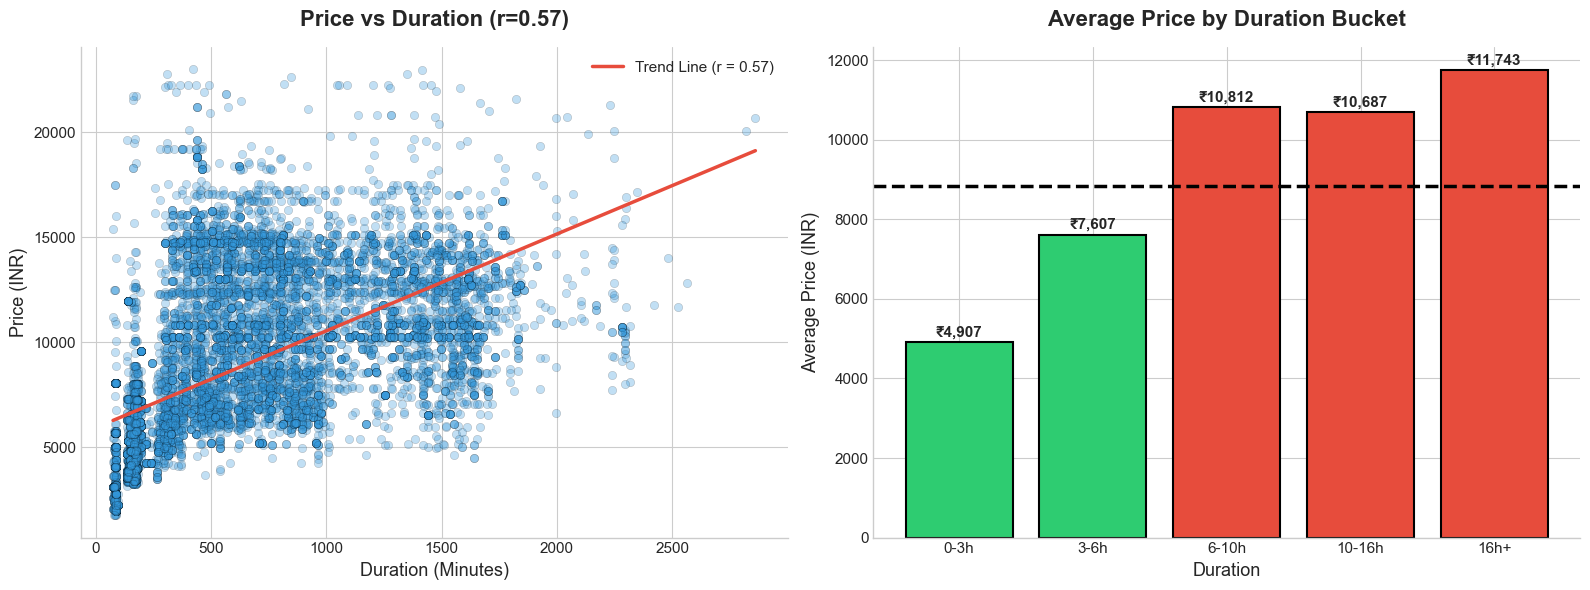

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]
ax.scatter(df['Duration_Minutes'], df['Price'], alpha=0.3, 
           edgecolors='black', linewidth=0.3, c=COLOR_NEUTRAL)
z = np.polyfit(df['Duration_Minutes'], df['Price'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['Duration_Minutes'].min(), df['Duration_Minutes'].max(), 100)
ax.plot(x_line, p(x_line), color=COLOR_MEAN, linewidth=LINE_WIDTH, 
        label=f'Trend Line (r = {correlation:.2f})')
style_axis(ax, f'Price vs Duration (r={correlation:.2f})', 'Duration (Minutes)', 'Price (INR)')
ax.legend(fontsize=LEGEND_SIZE)

ax = axes[1]
df['Duration_Bucket'] = pd.cut(df['Duration_Minutes'], 
                                bins=[0, 180, 360, 600, 1000, 3000],
                                labels=['0-3h', '3-6h', '6-10h', '10-16h', '16h+'])
mean_by_duration = df.groupby('Duration_Bucket', observed=True)['Price'].mean()
colors = [COLOR_GOOD if x < df['Price'].mean() else COLOR_BAD for x in mean_by_duration.values]
bars = ax.bar(range(len(mean_by_duration)), mean_by_duration.values, color=colors,
              edgecolor='black', linewidth=BAR_EDGE_WIDTH)
ax.set_xticks(range(len(mean_by_duration)))
ax.set_xticklabels(mean_by_duration.index)
ax.axhline(df['Price'].mean(), color='black', linestyle='--', linewidth=LINE_WIDTH)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 150, 
            f'₹{height:,.0f}', ha='center', fontsize=ANNOTATION_SIZE, fontweight='bold')

style_axis(ax, 'Average Price by Duration Bucket', 'Duration', 'Average Price (INR)')

plt.tight_layout()
plt.show()

df.drop('Duration_Bucket', axis=1, inplace=True)

### Q4: How do departure times (time of day) influence ticket prices?

In [129]:
def get_time_bucket(hour):
    if 4 <= hour < 8:
        return '2. Early Morning (4-8)'
    elif 8 <= hour < 12:
        return '3. Morning (8-12)'
    elif 12 <= hour < 16:
        return '4. Afternoon (12-16)'
    elif 16 <= hour < 20:
        return '5. Evening (16-20)'
    elif 20 <= hour < 24:
        return '6. Night (20-24)'
    else:
        return '1. Red-eye (0-4)'

df['Dep_Time_Bucket'] = df['Dep_Hour'].apply(get_time_bucket)
time_stats = df.groupby('Dep_Time_Bucket')['Price'].agg(['mean', 'median', 'count']).round(0)
time_stats

,mean,median,count
Dep_Time_Bucket,,,
1. Red-eye (0-4),7843.0,5678.0,293
2. Early Morning (4-8),8352.0,7514.0,2267
3. Morning (8-12),9330.0,8844.0,2661
4. Afternoon (12-16),8858.0,7879.0,1402
5. Evening (16-20),9077.0,8541.0,2117
6. Night (20-24),8519.0,8372.0,1623


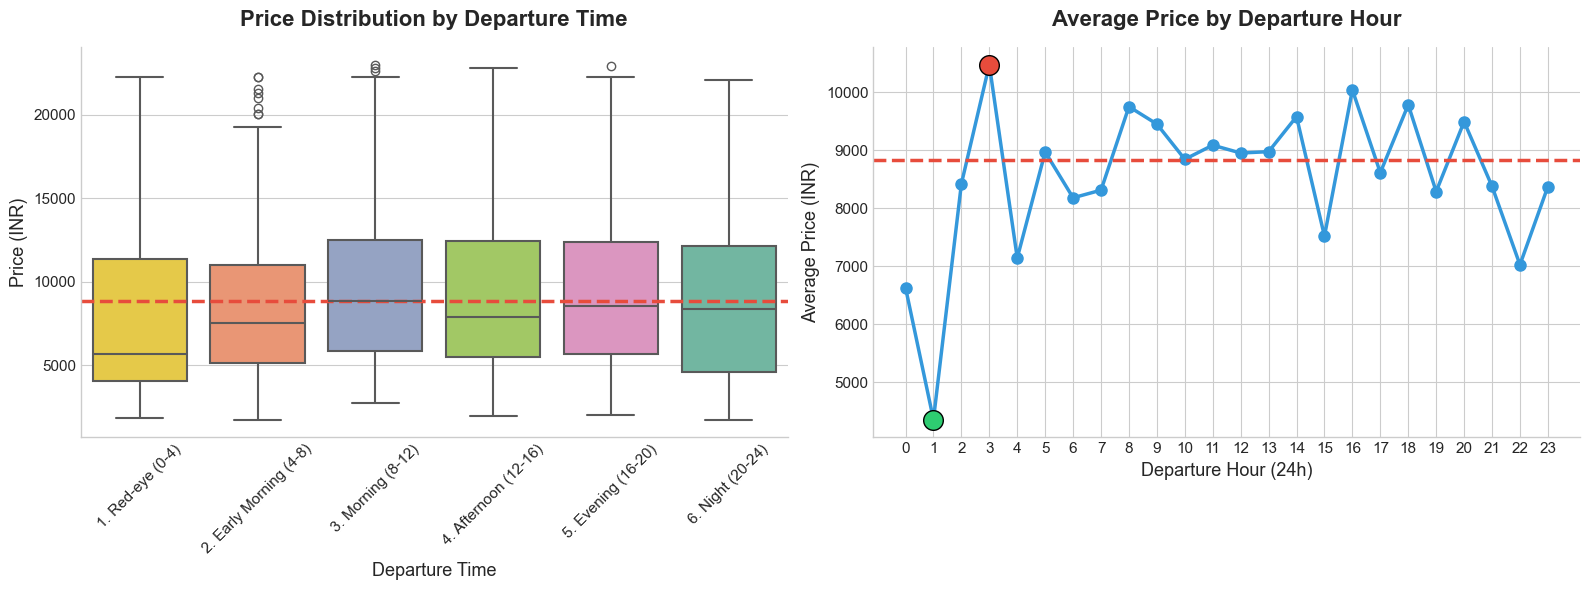

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]
time_order = sorted(df['Dep_Time_Bucket'].unique())
sns.boxplot(x='Dep_Time_Bucket', y='Price', data=df, order=time_order, ax=ax,
            linewidth=BOX_LINE_WIDTH, palette='Set2', hue='Dep_Time_Bucket', legend=False)
ax.axhline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH)
style_axis(ax, 'Price Distribution by Departure Time', 'Departure Time', 'Price (INR)')
ax.tick_params(axis='x', rotation=45)

ax = axes[1]
mean_by_hour = df.groupby('Dep_Hour')['Price'].mean()
ax.plot(mean_by_hour.index, mean_by_hour.values, marker='o', linewidth=LINE_WIDTH, 
        markersize=8, color=COLOR_NEUTRAL)
ax.axhline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH)

min_hour = mean_by_hour.idxmin()
max_hour = mean_by_hour.idxmax()
ax.scatter([min_hour], [mean_by_hour[min_hour]], color=COLOR_GOOD, s=200, zorder=5, edgecolors='black')
ax.scatter([max_hour], [mean_by_hour[max_hour]], color=COLOR_BAD, s=200, zorder=5, edgecolors='black')

style_axis(ax, 'Average Price by Departure Hour', 'Departure Hour (24h)', 'Average Price (INR)')
ax.set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

df.drop('Dep_Time_Bucket', axis=1, inplace=True)

### Q5: Which routes (Source → Destination) are most and least expensive?

In [131]:
route_stats = df.groupby('Route_Pair')['Price'].agg(['mean', 'median', 'count']).round(0)
route_stats = route_stats.sort_values('mean', ascending=False)
route_stats

,mean,median,count
Route_Pair,,,
Banglore_New Delhi,10417.0,10052.0,840
Delhi_Cochin,10386.0,10262.0,4329
Kolkata_Banglore,9135.0,9345.0,2859
Banglore_Delhi,5144.0,4823.0,1265
Mumbai_Hyderabad,4873.0,3210.0,689
Chennai_Kolkata,4790.0,3850.0,381


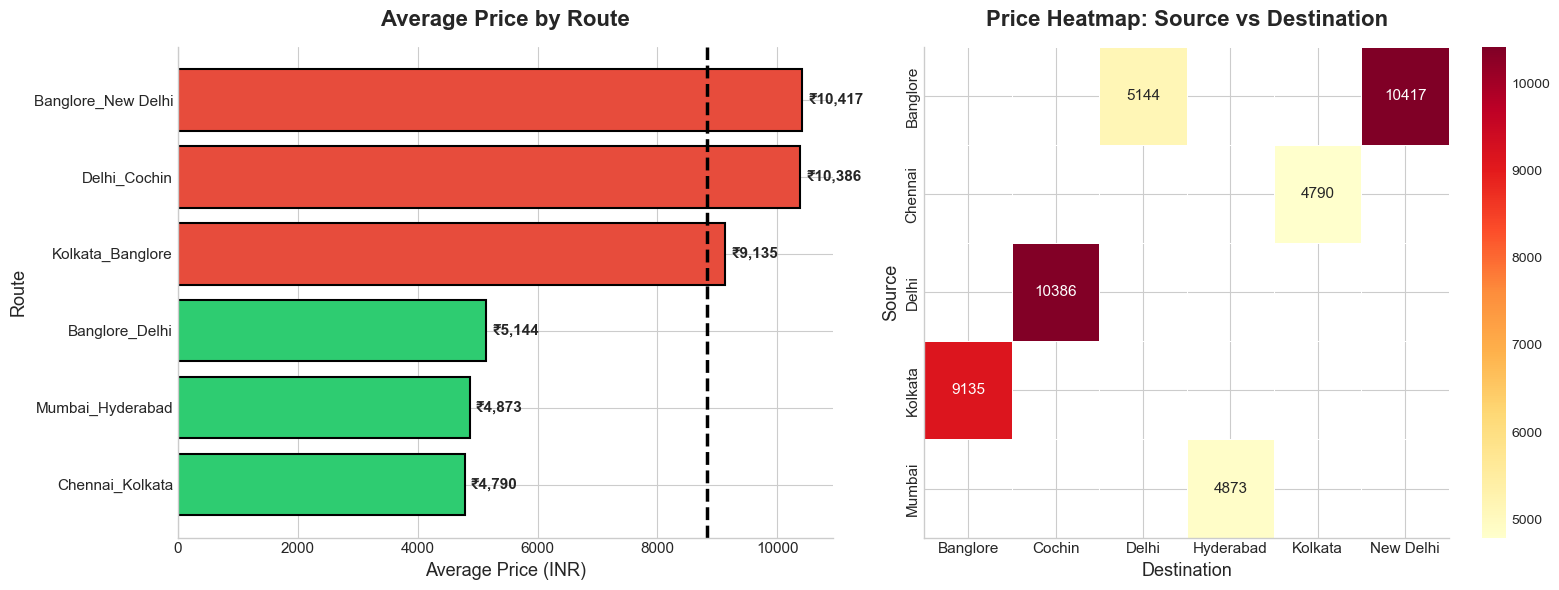

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]
mean_by_route = df.groupby('Route_Pair')['Price'].mean().sort_values(ascending=True)
colors = [COLOR_GOOD if x < df['Price'].mean() else COLOR_BAD for x in mean_by_route.values]
bars = ax.barh(mean_by_route.index, mean_by_route.values, color=colors,
               edgecolor='black', linewidth=BAR_EDGE_WIDTH)
ax.axvline(df['Price'].mean(), color='black', linestyle='--', linewidth=LINE_WIDTH)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 100, bar.get_y() + bar.get_height()/2., 
            f'₹{width:,.0f}', va='center', fontsize=ANNOTATION_SIZE, fontweight='bold')

style_axis(ax, 'Average Price by Route', 'Average Price (INR)', 'Route')

ax = axes[1]
pivot_table = df.pivot_table(values='Price', index='Source', columns='Destination', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, ax=ax,
            annot_kws={'size': ANNOTATION_SIZE})
style_axis(ax, 'Price Heatmap: Source vs Destination', 'Destination', 'Source')

plt.tight_layout()
plt.show()

### Q6: Does day of week affect flight prices?

In [133]:
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day_Name'] = df['Journey_Day_of_Week'].map(day_names)

day_stats = df.groupby('Journey_Day_of_Week')['Price'].agg(['mean', 'median', 'count']).round(0)
day_stats['Day'] = day_stats.index.map(day_names)
day_stats

,mean,median,count,Day
Journey_Day_of_Week,,,,
0,8351.0,7480.0,1805,Monday
1,8911.0,8452.0,851,Tuesday
2,9176.0,8524.0,2040,Wednesday
3,8820.0,8266.0,1773,Thursday
4,7867.0,6534.0,832,Friday
5,8851.0,8146.0,1621,Saturday
6,9446.0,9413.0,1441,Sunday


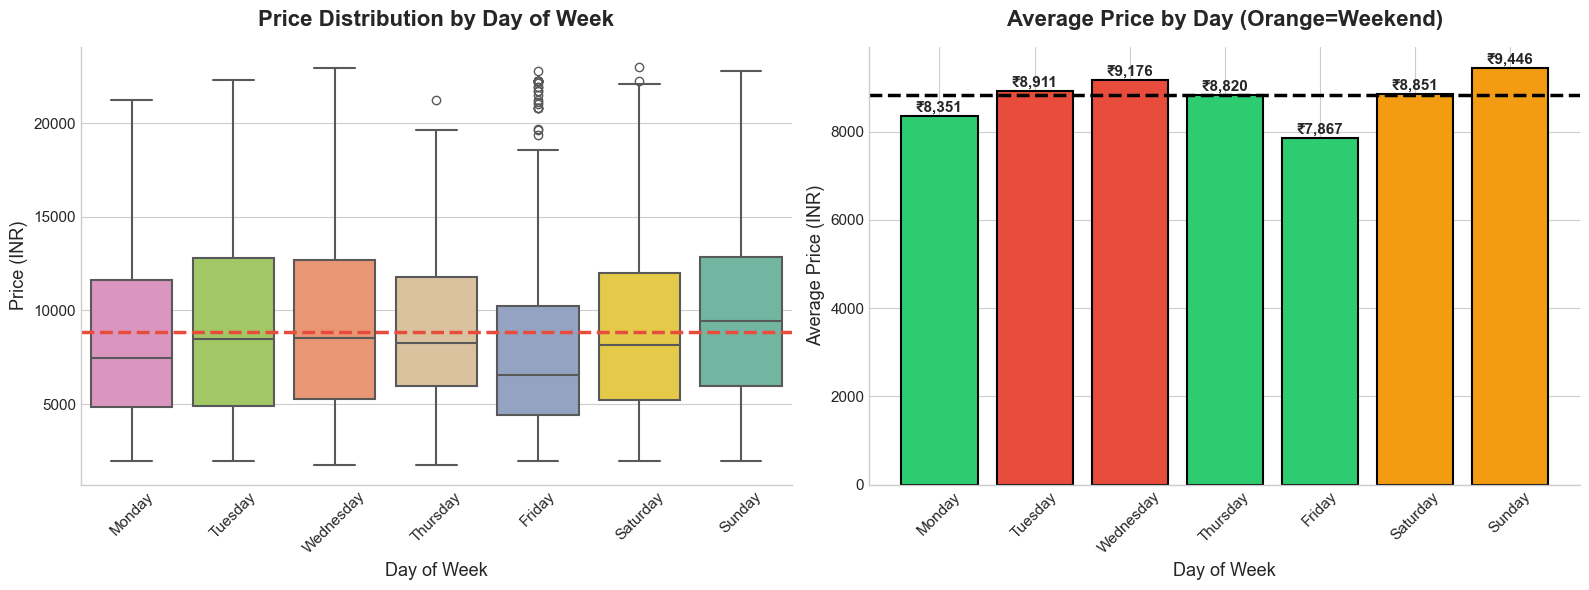

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x='Day_Name', y='Price', data=df, order=day_order, ax=ax,
            linewidth=BOX_LINE_WIDTH, palette='Set2', hue='Day_Name', legend=False)
ax.axhline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH)
style_axis(ax, 'Price Distribution by Day of Week', 'Day of Week', 'Price (INR)')
ax.tick_params(axis='x', rotation=45)

ax = axes[1]
mean_by_day = df.groupby('Day_Name')['Price'].mean().reindex(day_order)
colors = [COLOR_GOOD if x < df['Price'].mean() else COLOR_BAD for x in mean_by_day.values]
colors[-2] = '#f39c12'
colors[-1] = '#f39c12'

bars = ax.bar(range(len(mean_by_day)), mean_by_day.values, color=colors,
              edgecolor='black', linewidth=BAR_EDGE_WIDTH)
ax.set_xticks(range(len(mean_by_day)))
ax.set_xticklabels(day_order, rotation=45)
ax.axhline(df['Price'].mean(), color='black', linestyle='--', linewidth=LINE_WIDTH)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'₹{height:,.0f}', ha='center', fontsize=TICK_SIZE, fontweight='bold')

style_axis(ax, 'Average Price by Day (Orange=Weekend)', 'Day of Week', 'Average Price (INR)')

plt.tight_layout()
plt.show()

df.drop('Day_Name', axis=1, inplace=True)

### Q7: Does month affect flight prices?

In [135]:
month_names = {3: 'March', 4: 'April', 5: 'May', 6: 'June'}
df['Month_Name'] = df['Journey_Month'].map(month_names)

month_stats = df.groupby('Journey_Month')['Price'].agg(['mean', 'median', 'count']).round(0)
month_stats['Month'] = month_stats.index.map(month_names)
month_stats

,mean,median,count,Month
Journey_Month,,,,
3,9983.0,9186.0,2580,March
4,5767.0,5073.0,1078,April
5,9022.0,8662.0,3394,May
6,8736.0,8510.0,3311,June


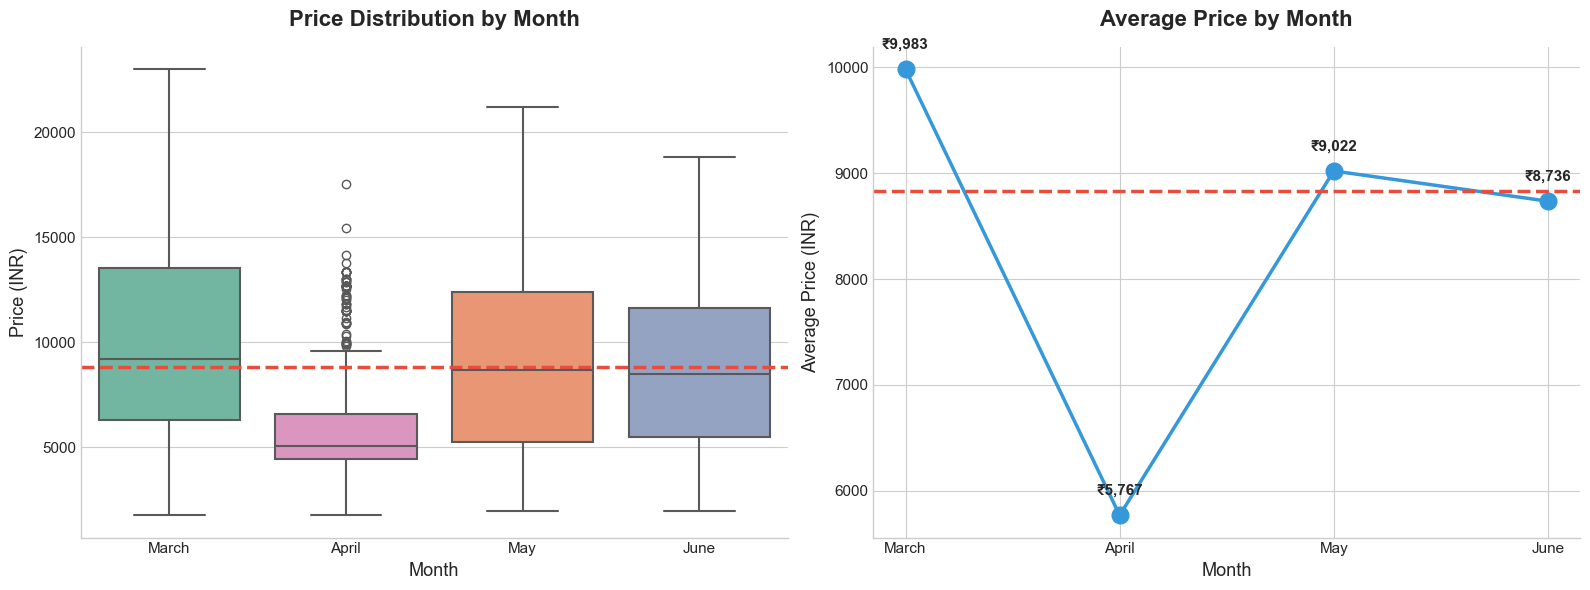

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]
month_order = ['March', 'April', 'May', 'June']
sns.boxplot(x='Month_Name', y='Price', data=df, order=month_order, ax=ax,
            linewidth=BOX_LINE_WIDTH, palette='Set2', hue='Month_Name', legend=False)
ax.axhline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH)
style_axis(ax, 'Price Distribution by Month', 'Month', 'Price (INR)')

ax = axes[1]
mean_by_month = df.groupby('Journey_Month')['Price'].mean().sort_index()
ax.plot(mean_by_month.index, mean_by_month.values, marker='o', linewidth=LINE_WIDTH,
        markersize=12, color=COLOR_NEUTRAL)
ax.axhline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH)

for month, price in mean_by_month.items():
    ax.annotate(f'₹{price:,.0f}', xy=(month, price), xytext=(0, 15),
                textcoords='offset points', ha='center', fontsize=ANNOTATION_SIZE, fontweight='bold')

ax.set_xticks(mean_by_month.index)
ax.set_xticklabels([month_names[m] for m in mean_by_month.index])
style_axis(ax, 'Average Price by Month', 'Month', 'Average Price (INR)')

plt.tight_layout()
plt.show()

df.drop('Month_Name', axis=1, inplace=True)

### Q8: Which airline offers best value for non-stop flights?

In [137]:
non_stop = df[df['Stops'] == 0].copy()
print(f"Non-stop flights: {len(non_stop)} ({len(non_stop)/len(df)*100:.1f}% of total)")

nonstop_stats = non_stop.groupby('Airline').agg({
    'Price': ['mean', 'median', 'count'],
    'Duration_Minutes': 'mean'
}).round(0)
nonstop_stats.columns = ['Avg_Price', 'Median_Price', 'Count', 'Avg_Duration']
nonstop_stats['Price_Per_Hour'] = (nonstop_stats['Avg_Price'] / (nonstop_stats['Avg_Duration'] / 60)).round(0)
nonstop_stats = nonstop_stats.sort_values('Avg_Price')
nonstop_stats

Non-stop flights: 3470 (33.5% of total)


,Avg_Price,Median_Price,Count,Avg_Duration,Price_Per_Hour
Airline,,,,,
SpiceJet,3800.0,3841.0,667,141.0,1617.0
Air Asia,4492.0,4384.0,180,160.0,1684.0
IndiGo,4715.0,4752.0,1231,151.0,1874.0
GoAir,4726.0,3898.0,92,171.0,1658.0
Air India,5439.0,5228.0,413,145.0,2251.0
Jet Airways,6173.0,6144.0,622,149.0,2486.0
Vistara,6292.0,5403.0,262,164.0,2302.0
Vistara Premium economy,8962.0,9125.0,3,153.0,3515.0


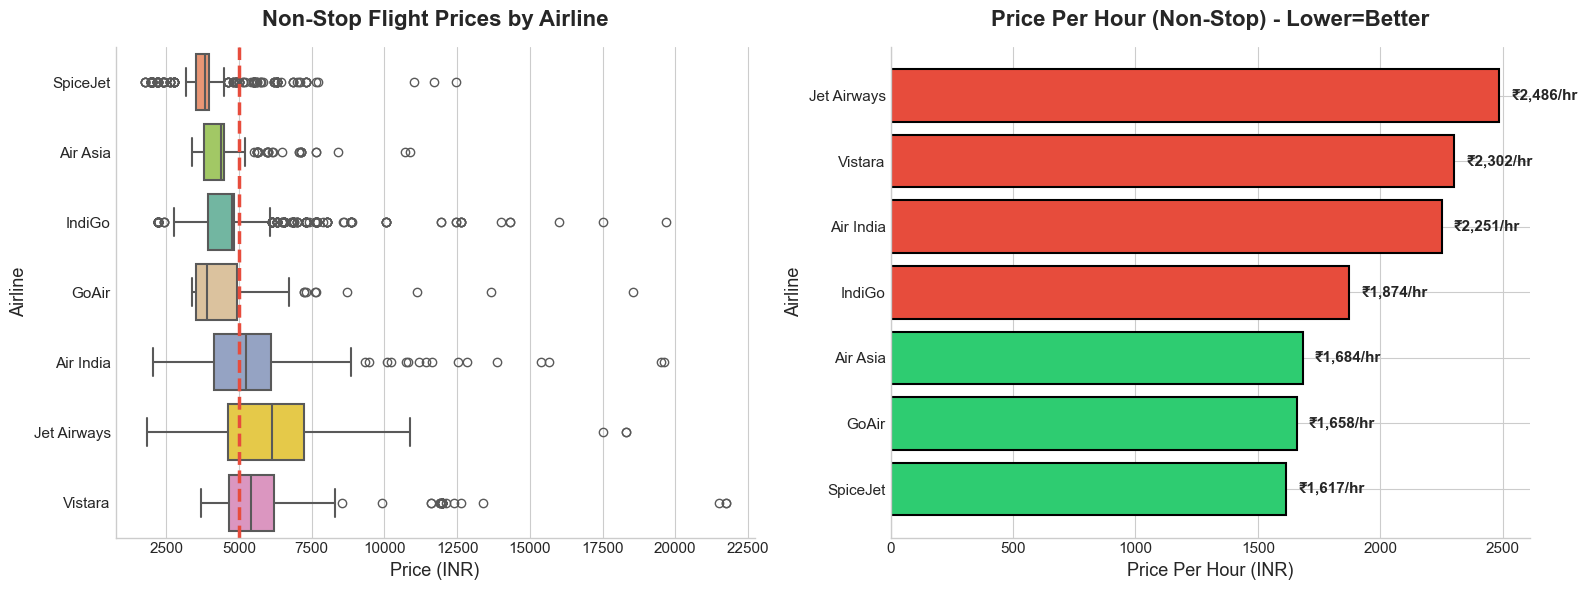

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

valid_airlines = nonstop_stats[nonstop_stats['Count'] > 10].index.tolist()
nonstop_filtered = non_stop[non_stop['Airline'].isin(valid_airlines)]

ax = axes[0]
order = nonstop_filtered.groupby('Airline')['Price'].mean().sort_values().index
sns.boxplot(x='Price', y='Airline', data=nonstop_filtered, order=order, ax=ax,
            linewidth=BOX_LINE_WIDTH, palette='Set2', hue='Airline', legend=False)
ax.axvline(nonstop_filtered['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH)
style_axis(ax, 'Non-Stop Flight Prices by Airline', 'Price (INR)', 'Airline')

ax = axes[1]
price_per_hour = nonstop_stats[nonstop_stats['Count'] > 10]['Price_Per_Hour'].sort_values()
colors = [COLOR_GOOD if i < len(price_per_hour)//2 else COLOR_BAD for i in range(len(price_per_hour))]
bars = ax.barh(price_per_hour.index, price_per_hour.values, color=colors,
               edgecolor='black', linewidth=BAR_EDGE_WIDTH)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 50, bar.get_y() + bar.get_height()/2.,
            f'₹{width:,.0f}/hr', va='center', fontsize=TICK_SIZE, fontweight='bold')

style_axis(ax, 'Price Per Hour (Non-Stop) - Lower=Better', 'Price Per Hour (INR)', 'Airline')

plt.tight_layout()
plt.show()

---
## 3.4 Deep Dive: Stops, Duration & Price Relationship (NEW)

### 3.4.1 Non-Stop vs Connecting Flights Analysis

In [139]:
# Create flight category
df['Flight_Type'] = df['Stops'].apply(lambda x: 'Non-Stop' if x == 0 else 'Connecting')

# Statistics
flight_type_stats = df.groupby('Flight_Type').agg({
    'Price': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'Duration_Minutes': ['mean', 'median']
}).round(0)

flight_type_stats.columns = ['Price_Mean', 'Price_Median', 'Price_Std', 'Price_Min', 'Price_Max', 'Count',
                              'Duration_Mean', 'Duration_Median']
flight_type_stats

,Price_Mean,Price_Median,Price_Std,Price_Min,Price_Max,Count,Duration_Mean,Duration_Median
Flight_Type,,,,,,,,
Connecting,10761.0,10676.0,3437.0,3480,23001,6893,870.0,765.0
Non-Stop,4998.0,4667.0,1966.0,1759,21730,3470,150.0,160.0


Non-stop flights duration stats:
  Min: 75 min
  Max: 230 min
  Mean: 150 min
  Median: 160 min

Non-stop flights by duration (threshold: 160 min):
Duration_Category
Short Duration    1795
Long Duration     1675
Name: count, dtype: int64


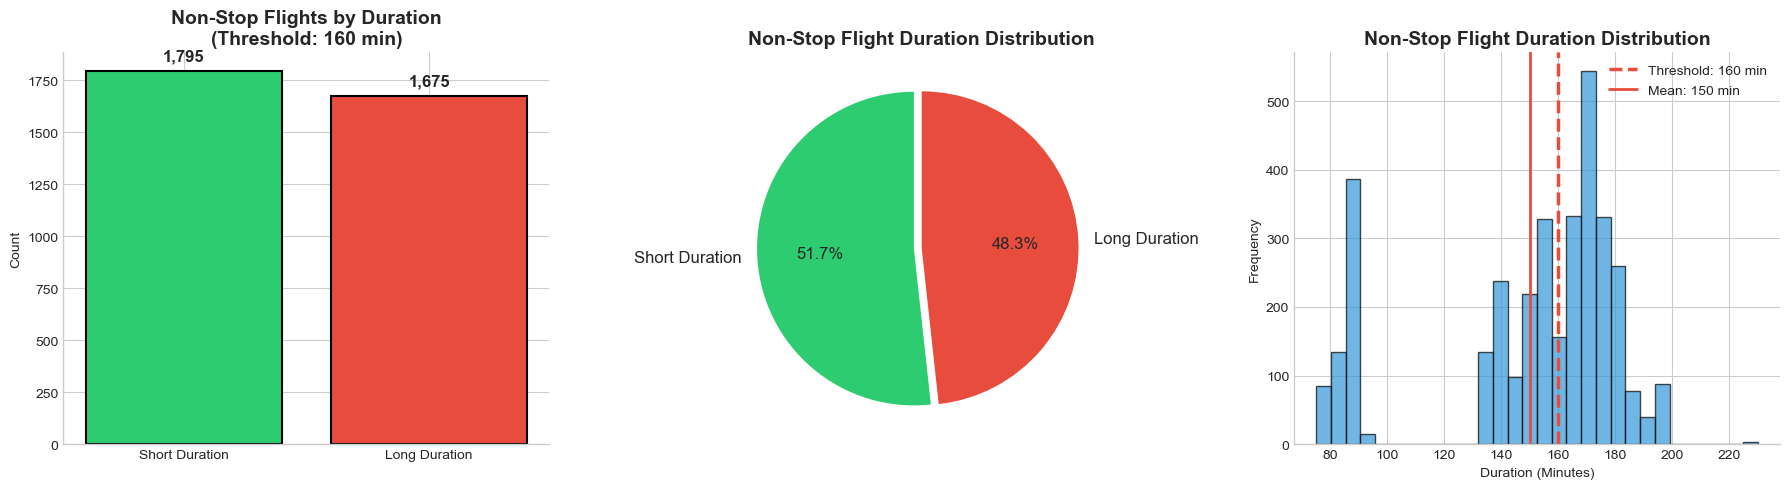


Price Comparison:
                     mean  median  count
Duration_Category                       
Long Duration      5573.0  4990.0   1675
Short Duration     4461.0  4050.0   1795


In [140]:
# Define what "long duration" means for non-stop flights
non_stop = df[df['Stops'] == 0].copy()

# Check distribution first
print(f"Non-stop flights duration stats:")
print(f"  Min: {non_stop['Duration_Minutes'].min()} min")
print(f"  Max: {non_stop['Duration_Minutes'].max()} min")
print(f"  Mean: {non_stop['Duration_Minutes'].mean():.0f} min")
print(f"  Median: {non_stop['Duration_Minutes'].median():.0f} min")

# Define long duration threshold (e.g., above median or specific value)
threshold = non_stop['Duration_Minutes'].median()  # or use 180 (3 hours)

non_stop['Duration_Category'] = non_stop['Duration_Minutes'].apply(
    lambda x: 'Long Duration' if x > threshold else 'Short Duration'
)

# Count
duration_counts = non_stop['Duration_Category'].value_counts()
print(f"\nNon-stop flights by duration (threshold: {threshold:.0f} min):")
print(duration_counts)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Bar Chart - Count
ax = axes[0]
colors = [COLOR_GOOD, COLOR_BAD]
bars = ax.bar(duration_counts.index, duration_counts.values, color=colors, 
              edgecolor='black', linewidth=1.5)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{int(height):,}', ha='center', fontsize=12, fontweight='bold')
ax.set_title(f'Non-Stop Flights by Duration\n(Threshold: {threshold:.0f} min)', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Count')
sns.despine(ax=ax)

# 2. Pie Chart - Percentage
ax = axes[1]
ax.pie(duration_counts.values, labels=duration_counts.index, autopct='%1.1f%%',
       colors=colors, explode=[0.05, 0], startangle=90,
       textprops={'fontsize': 12})
ax.set_title('Non-Stop Flight Duration Distribution', fontsize=14, fontweight='bold')

# 3. Histogram with threshold line
ax = axes[2]
ax.hist(non_stop['Duration_Minutes'], bins=30, edgecolor='black', 
        color=COLOR_NEUTRAL, alpha=0.7)
ax.axvline(threshold, color=COLOR_BAD, linestyle='--', linewidth=2.5,
           label=f'Threshold: {threshold:.0f} min')
ax.axvline(non_stop['Duration_Minutes'].mean(), color=COLOR_MEAN, linestyle='-', 
           linewidth=2, label=f'Mean: {non_stop["Duration_Minutes"].mean():.0f} min')
ax.set_title('Non-Stop Flight Duration Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Duration (Minutes)')
ax.set_ylabel('Frequency')
ax.legend()
sns.despine(ax=ax)

plt.tight_layout()
plt.show()

# Bonus: Price comparison
print(f"\nPrice Comparison:")
price_by_duration = non_stop.groupby('Duration_Category')['Price'].agg(['mean', 'median', 'count'])
print(price_by_duration.round(0))

Flights with stops - duration stats:
  Min: 195 min
  Max: 2860 min
  Mean: 870 min
  Median: 765 min

Flights with stops by duration (threshold: 765 min):
Duration_Category
Short Duration    3495
Long Duration     3398
Name: count, dtype: int64


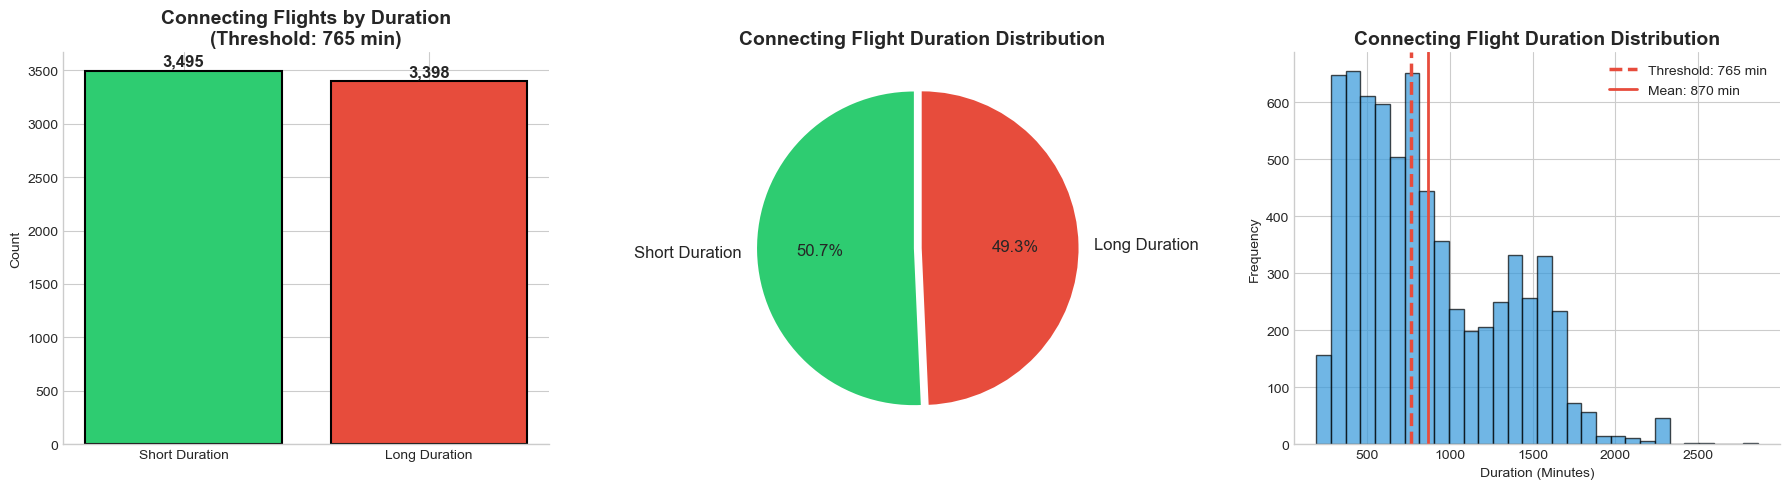


Price Comparison:
                      mean   median  count
Duration_Category                         
Long Duration      11317.0  11087.0   3398
Short Duration     10220.0   9794.0   3495


In [141]:
# Flights with stops (connecting flights)
with_stops = df[df['Stops'] > 0].copy()

# Check distribution first
print(f"Flights with stops - duration stats:")
print(f"  Min: {with_stops['Duration_Minutes'].min()} min")
print(f"  Max: {with_stops['Duration_Minutes'].max()} min")
print(f"  Mean: {with_stops['Duration_Minutes'].mean():.0f} min")
print(f"  Median: {with_stops['Duration_Minutes'].median():.0f} min")

# Define long duration threshold
threshold = with_stops['Duration_Minutes'].median()  # or use 600 (10 hours)

with_stops['Duration_Category'] = with_stops['Duration_Minutes'].apply(
    lambda x: 'Long Duration' if x > threshold else 'Short Duration'
)

# Count
duration_counts = with_stops['Duration_Category'].value_counts()
print(f"\nFlights with stops by duration (threshold: {threshold:.0f} min):")
print(duration_counts)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Bar Chart - Count
ax = axes[0]
colors = [COLOR_GOOD, COLOR_BAD]
bars = ax.bar(duration_counts.index, duration_counts.values, color=colors, 
              edgecolor='black', linewidth=1.5)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{int(height):,}', ha='center', fontsize=12, fontweight='bold')
ax.set_title(f'Connecting Flights by Duration\n(Threshold: {threshold:.0f} min)', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Count')
sns.despine(ax=ax)

# 2. Pie Chart - Percentage
ax = axes[1]
ax.pie(duration_counts.values, labels=duration_counts.index, autopct='%1.1f%%',
       colors=colors, explode=[0.05, 0], startangle=90,
       textprops={'fontsize': 12})
ax.set_title('Connecting Flight Duration Distribution', fontsize=14, fontweight='bold')

# 3. Histogram with threshold line
ax = axes[2]
ax.hist(with_stops['Duration_Minutes'], bins=30, edgecolor='black', 
        color=COLOR_NEUTRAL, alpha=0.7)
ax.axvline(threshold, color=COLOR_BAD, linestyle='--', linewidth=2.5,
           label=f'Threshold: {threshold:.0f} min')
ax.axvline(with_stops['Duration_Minutes'].mean(), color=COLOR_MEAN, linestyle='-', 
           linewidth=2, label=f'Mean: {with_stops["Duration_Minutes"].mean():.0f} min')
ax.set_title('Connecting Flight Duration Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Duration (Minutes)')
ax.set_ylabel('Frequency')
ax.legend()
sns.despine(ax=ax)

plt.tight_layout()
plt.show()

# Price comparison
print(f"\nPrice Comparison:")
price_by_duration = with_stops.groupby('Duration_Category')['Price'].agg(['mean', 'median', 'count'])
print(price_by_duration.round(0))

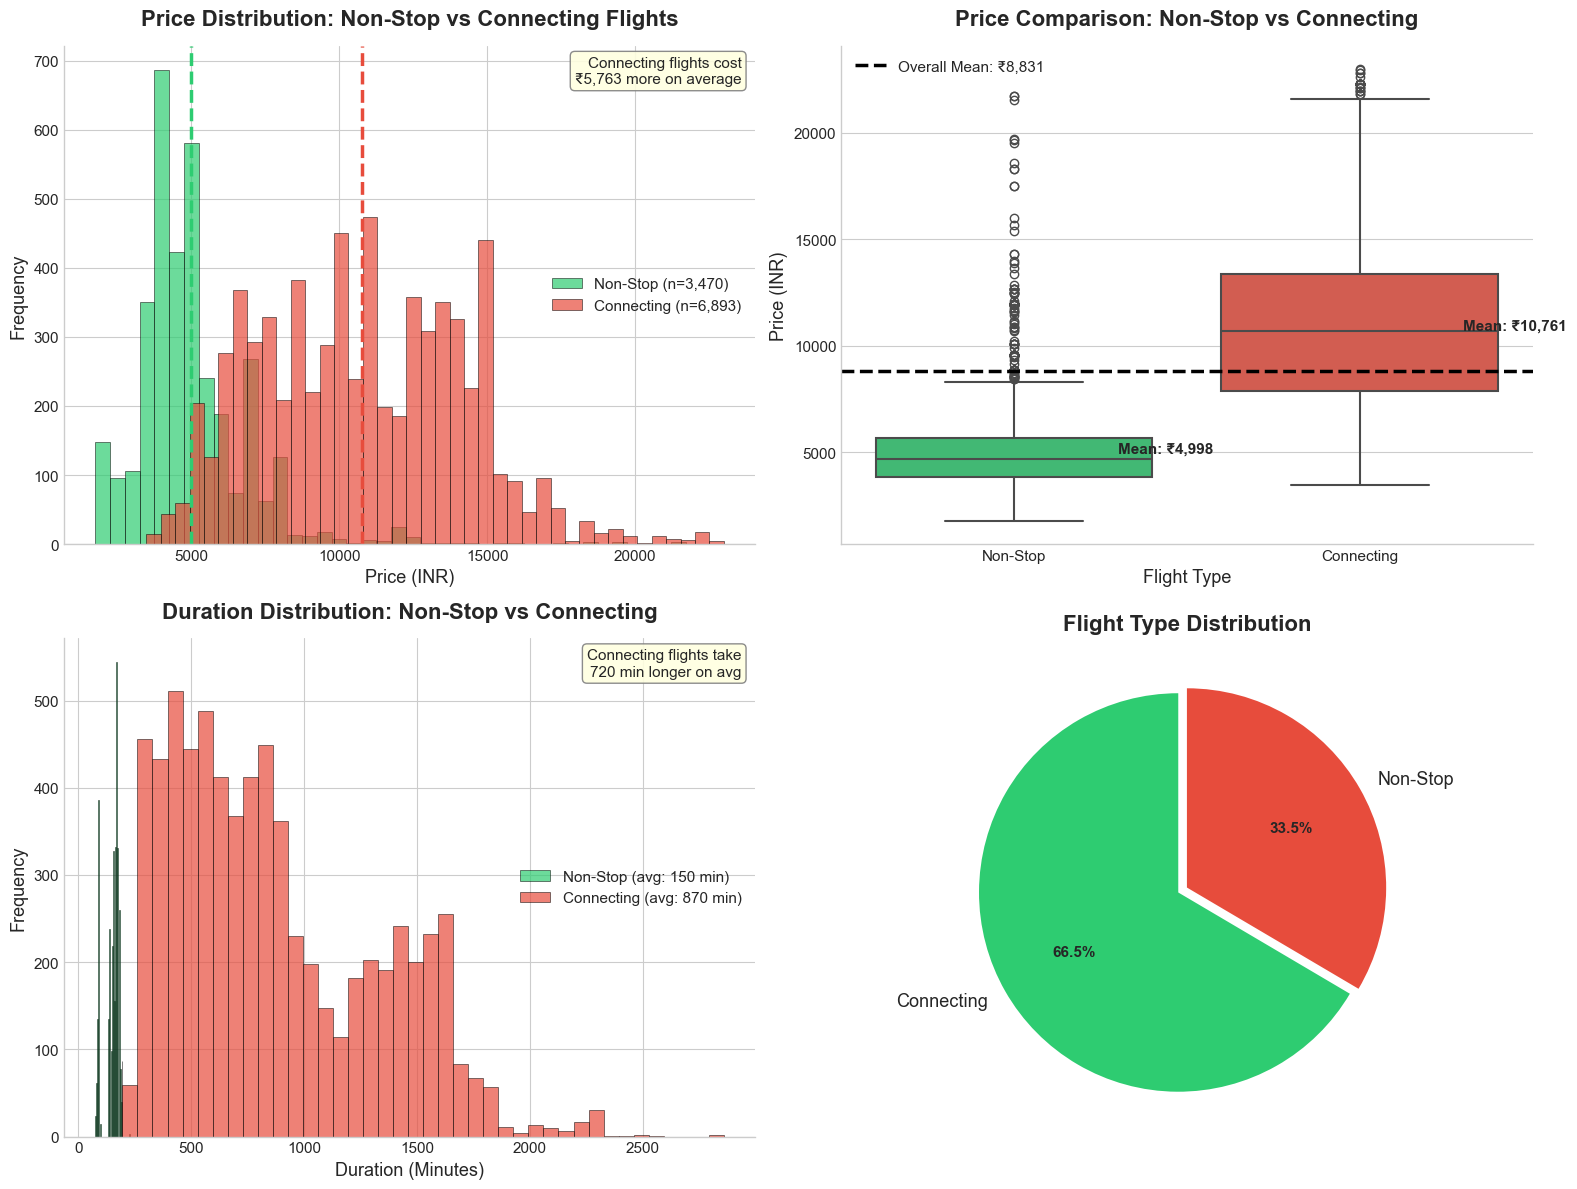

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price Distribution: Non-Stop vs Connecting
ax = axes[0, 0]
non_stop_prices = df[df['Flight_Type'] == 'Non-Stop']['Price']
connecting_prices = df[df['Flight_Type'] == 'Connecting']['Price']

ax.hist(non_stop_prices, bins=40, alpha=0.7, label=f'Non-Stop (n={len(non_stop_prices):,})', 
        color=COLOR_GOOD, edgecolor='black', linewidth=0.5)
ax.hist(connecting_prices, bins=40, alpha=0.7, label=f'Connecting (n={len(connecting_prices):,})', 
        color=COLOR_BAD, edgecolor='black', linewidth=0.5)
ax.axvline(non_stop_prices.mean(), color=COLOR_GOOD, linestyle='--', linewidth=LINE_WIDTH)
ax.axvline(connecting_prices.mean(), color=COLOR_BAD, linestyle='--', linewidth=LINE_WIDTH)
style_axis(ax, 'Price Distribution: Non-Stop vs Connecting Flights', 'Price (INR)', 'Frequency')
ax.legend(fontsize=LEGEND_SIZE)

price_diff = connecting_prices.mean() - non_stop_prices.mean()
add_conclusion_box(ax, f"Connecting flights cost\n₹{price_diff:,.0f} more on average", 'upper right')

# 2. Box Plot Comparison
ax = axes[0, 1]
sns.boxplot(x='Flight_Type', y='Price', data=df, ax=ax, palette=[COLOR_GOOD, COLOR_BAD],
            linewidth=BOX_LINE_WIDTH, hue='Flight_Type', legend=False)
ax.axhline(df['Price'].mean(), color='black', linestyle='--', linewidth=LINE_WIDTH,
           label=f"Overall Mean: ₹{df['Price'].mean():,.0f}")
style_axis(ax, 'Price Comparison: Non-Stop vs Connecting', 'Flight Type', 'Price (INR)')
ax.legend(fontsize=LEGEND_SIZE)

# Add mean annotations
for i, flight_type in enumerate(['Non-Stop', 'Connecting']):
    mean_val = df[df['Flight_Type'] == flight_type]['Price'].mean()
    ax.annotate(f'Mean: ₹{mean_val:,.0f}', xy=(i, mean_val), xytext=(i+0.3, mean_val),
                fontsize=ANNOTATION_SIZE, fontweight='bold')

# 3. Duration Distribution by Flight Type
ax = axes[1, 0]
non_stop_duration = df[df['Flight_Type'] == 'Non-Stop']['Duration_Minutes']
connecting_duration = df[df['Flight_Type'] == 'Connecting']['Duration_Minutes']

ax.hist(non_stop_duration, bins=40, alpha=0.7, label=f'Non-Stop (avg: {non_stop_duration.mean():.0f} min)', 
        color=COLOR_GOOD, edgecolor='black', linewidth=0.5)
ax.hist(connecting_duration, bins=40, alpha=0.7, label=f'Connecting (avg: {connecting_duration.mean():.0f} min)', 
        color=COLOR_BAD, edgecolor='black', linewidth=0.5)
style_axis(ax, 'Duration Distribution: Non-Stop vs Connecting', 'Duration (Minutes)', 'Frequency')
ax.legend(fontsize=LEGEND_SIZE)

duration_diff = connecting_duration.mean() - non_stop_duration.mean()
add_conclusion_box(ax, f"Connecting flights take\n{duration_diff:.0f} min longer on avg", 'upper right')

# 4. Flight Count & Percentage
ax = axes[1, 1]
flight_counts = df['Flight_Type'].value_counts()
colors = [COLOR_GOOD, COLOR_BAD]
wedges, texts, autotexts = ax.pie(flight_counts.values, labels=flight_counts.index, autopct='%1.1f%%',
                                   colors=colors, explode=[0.05, 0], startangle=90,
                                   textprops={'fontsize': AXIS_LABEL_SIZE})
for autotext in autotexts:
    autotext.set_fontsize(ANNOTATION_SIZE)
    autotext.set_fontweight('bold')
ax.set_title('Flight Type Distribution', fontsize=TITLE_SIZE, fontweight='bold')

plt.tight_layout()
plt.show()

In [143]:
# Statistical Test: T-test for price difference
t_stat, p_value = stats.ttest_ind(non_stop_prices, connecting_prices)

print("STATISTICAL TEST: Non-Stop vs Connecting Prices")
print("="*50)
print(f"Non-Stop Mean: ₹{non_stop_prices.mean():,.0f}")
print(f"Connecting Mean: ₹{connecting_prices.mean():,.0f}")
print(f"Difference: ₹{connecting_prices.mean() - non_stop_prices.mean():,.0f}")
print(f"\nT-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2e}")
print(f"Significant (p < 0.05): {'Yes' if p_value < 0.05 else 'No'}")

STATISTICAL TEST: Non-Stop vs Connecting Prices
Non-Stop Mean: ₹4,998
Connecting Mean: ₹10,761
Difference: ₹5,763

T-statistic: -91.52
P-value: 0.00e+00
Significant (p < 0.05): Yes


### 3.4.2 Detailed Stops Analysis (1, 2, 3, 4 Stops)

In [144]:
# Detailed stats for each stop category
stops_detailed = df.groupby('Stops').agg({
    'Price': ['mean', 'median', 'std', 'count'],
    'Duration_Minutes': ['mean', 'median']
}).round(0)

stops_detailed.columns = ['Price_Mean', 'Price_Median', 'Price_Std', 'Count', 
                          'Duration_Mean', 'Duration_Median']
stops_detailed['Price_Per_Min'] = (stops_detailed['Price_Mean'] / stops_detailed['Duration_Mean']).round(2)
stops_detailed

,Price_Mean,Price_Median,Price_Std,Count,Duration_Mean,Duration_Median,Price_Per_Min
Stops,,,,,,,
0,4998.0,4667.0,1966.0,3470,150.0,160.0,33.32
1,10322.0,10262.0,3419.0,5550,782.0,705.0,13.20
2,12547.0,12723.0,2867.0,1299,1220.0,1245.0,10.28
3,13261.0,13007.0,2943.0,43,1513.0,1585.0,8.76
4,17686.0,17686.0,NaN,1,1770.0,1770.0,9.99


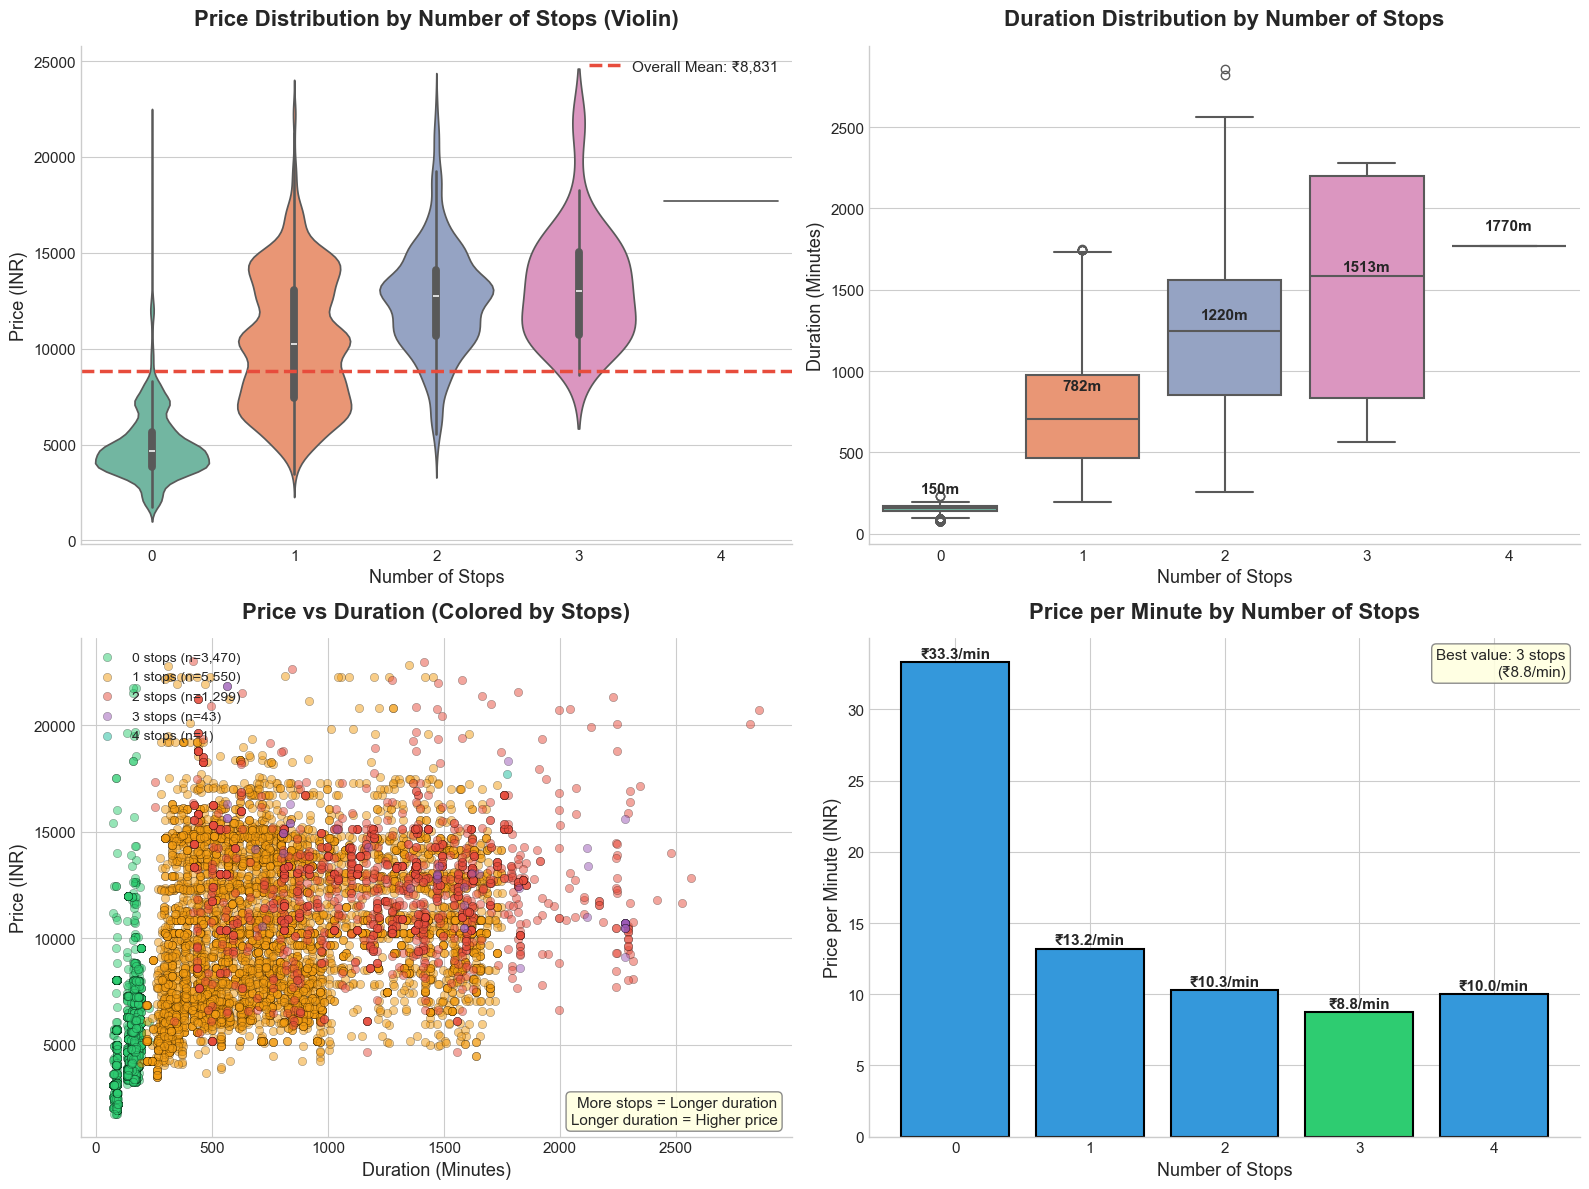

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price by Number of Stops (Violin Plot)
ax = axes[0, 0]
sns.violinplot(x='Stops', y='Price', data=df, ax=ax, palette='Set2', hue='Stops', legend=False)
ax.axhline(df['Price'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=LINE_WIDTH,
           label=f"Overall Mean: ₹{df['Price'].mean():,.0f}")
style_axis(ax, 'Price Distribution by Number of Stops (Violin)', 'Number of Stops', 'Price (INR)')
ax.legend(fontsize=LEGEND_SIZE)

# 2. Duration by Number of Stops
ax = axes[0, 1]
sns.boxplot(x='Stops', y='Duration_Minutes', data=df, ax=ax, palette='Set2',
            linewidth=BOX_LINE_WIDTH, hue='Stops', legend=False)
style_axis(ax, 'Duration Distribution by Number of Stops', 'Number of Stops', 'Duration (Minutes)')

# Add mean annotations
for stops in sorted(df['Stops'].unique()):
    mean_dur = df[df['Stops'] == stops]['Duration_Minutes'].mean()
    ax.annotate(f'{mean_dur:.0f}m', xy=(stops, mean_dur), xytext=(stops, mean_dur + 100),
                fontsize=TICK_SIZE, ha='center', fontweight='bold')

# 3. Price vs Duration colored by Stops
ax = axes[1, 0]
colors_map = {0: COLOR_GOOD, 1: '#f39c12', 2: COLOR_BAD, 3: '#9b59b6', 4: '#1abc9c'}
for stops in sorted(df['Stops'].unique()):
    subset = df[df['Stops'] == stops]
    ax.scatter(subset['Duration_Minutes'], subset['Price'], alpha=0.5, 
               label=f'{stops} stops (n={len(subset):,})', color=colors_map.get(stops, 'gray'),
               edgecolors='black', linewidth=0.3)

style_axis(ax, 'Price vs Duration (Colored by Stops)', 'Duration (Minutes)', 'Price (INR)')
ax.legend(fontsize=LEGEND_SIZE-1, loc='upper left')

add_conclusion_box(ax, "More stops = Longer duration\nLonger duration = Higher price", 'lower right')

# 4. Price per Minute by Stops
ax = axes[1, 1]
price_per_min = stops_detailed['Price_Per_Min']
colors = [COLOR_GOOD if x == price_per_min.min() else COLOR_NEUTRAL for x in price_per_min.values]
bars = ax.bar(price_per_min.index, price_per_min.values, color=colors,
              edgecolor='black', linewidth=BAR_EDGE_WIDTH)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'₹{height:.1f}/min', ha='center', fontsize=ANNOTATION_SIZE, fontweight='bold')

style_axis(ax, 'Price per Minute by Number of Stops', 'Number of Stops', 'Price per Minute (INR)')
add_conclusion_box(ax, f"Best value: {price_per_min.idxmin()} stops\n(₹{price_per_min.min():.1f}/min)", 'upper right')

plt.tight_layout()
plt.show()

### 3.4.3 Duration vs Price Analysis (Controlling for Stops)

In [146]:
# Correlation within each stop category
print("CORRELATION: Duration vs Price (by Number of Stops)")
print("="*50)

correlations = {}
for stops in sorted(df['Stops'].unique()):
    subset = df[df['Stops'] == stops]
    corr = subset['Duration_Minutes'].corr(subset['Price'])
    correlations[stops] = corr
    print(f"{stops} stops: r = {corr:.3f} (n={len(subset):,})")

print(f"\nOverall: r = {df['Duration_Minutes'].corr(df['Price']):.3f}")

CORRELATION: Duration vs Price (by Number of Stops)
0 stops: r = 0.326 (n=3,470)
1 stops: r = 0.178 (n=5,550)
2 stops: r = -0.018 (n=1,299)
3 stops: r = -0.669 (n=43)
4 stops: r = nan (n=1)

Overall: r = 0.568


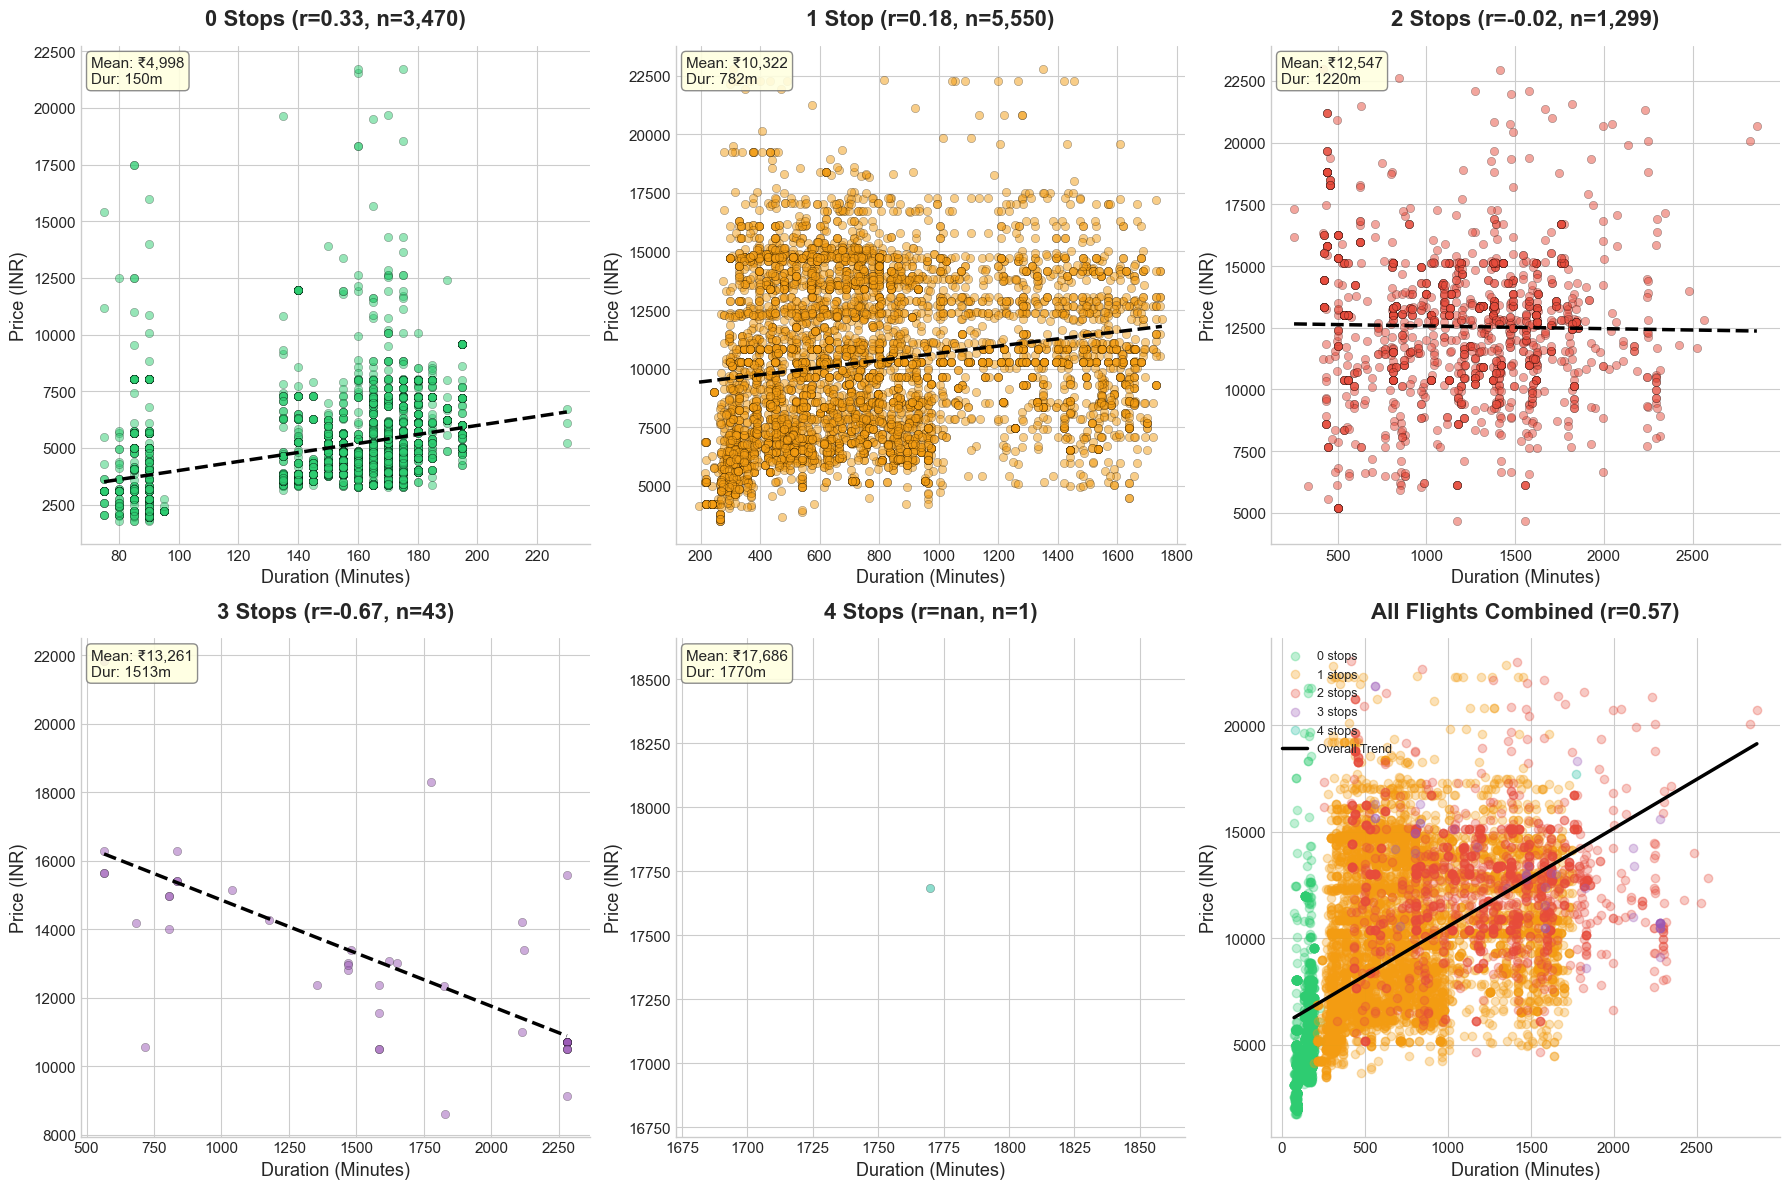

In [147]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot for each stop category
stop_values = sorted(df['Stops'].unique())
for i, stops in enumerate(stop_values):
    ax = axes[i]
    subset = df[df['Stops'] == stops]
    
    ax.scatter(subset['Duration_Minutes'], subset['Price'], alpha=0.5,
               color=colors_map.get(stops, COLOR_NEUTRAL), edgecolors='black', linewidth=0.3)
    
    # Trend line
    z = np.polyfit(subset['Duration_Minutes'], subset['Price'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(subset['Duration_Minutes'].min(), subset['Duration_Minutes'].max(), 100)
    ax.plot(x_line, p(x_line), color='black', linewidth=LINE_WIDTH, linestyle='--')
    
    corr = correlations[stops]
    style_axis(ax, f'{stops} Stop{"s" if stops != 1 else ""} (r={corr:.2f}, n={len(subset):,})', 
               'Duration (Minutes)', 'Price (INR)')
    
    # Add stats
    add_conclusion_box(ax, f"Mean: ₹{subset['Price'].mean():,.0f}\nDur: {subset['Duration_Minutes'].mean():.0f}m", 'upper left')

# Overall in last subplot
ax = axes[5]
for stops in stop_values:
    subset = df[df['Stops'] == stops]
    ax.scatter(subset['Duration_Minutes'], subset['Price'], alpha=0.3,
               color=colors_map.get(stops, 'gray'), label=f'{stops} stops')

# Overall trend line
z = np.polyfit(df['Duration_Minutes'], df['Price'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['Duration_Minutes'].min(), df['Duration_Minutes'].max(), 100)
ax.plot(x_line, p(x_line), color='black', linewidth=LINE_WIDTH, label='Overall Trend')

overall_corr = df['Duration_Minutes'].corr(df['Price'])
style_axis(ax, f'All Flights Combined (r={overall_corr:.2f})', 'Duration (Minutes)', 'Price (INR)')
ax.legend(fontsize=LEGEND_SIZE-2, loc='upper left')

plt.tight_layout()
plt.show()

### 3.4.4 Key Insight: Why More Stops = Higher Price?

In [148]:
# Create summary table
summary = df.groupby('Stops').agg({
    'Price': 'mean',
    'Duration_Minutes': 'mean'
}).round(0)

summary['Price_Increase_vs_NonStop'] = summary['Price'] - summary.loc[0, 'Price']
summary['Duration_Increase_vs_NonStop'] = summary['Duration_Minutes'] - summary.loc[0, 'Duration_Minutes']
summary['Price_Per_Extra_Hour'] = (summary['Price_Increase_vs_NonStop'] / (summary['Duration_Increase_vs_NonStop'] / 60)).round(0)

print("SUMMARY: Price & Duration by Stops (vs Non-Stop)")
print("="*70)
summary

SUMMARY: Price & Duration by Stops (vs Non-Stop)


,Price,Duration_Minutes,Price_Increase_vs_NonStop,Duration_Increase_vs_NonStop,Price_Per_Extra_Hour
Stops,,,,,
0,4998.0,150.0,0.0,0.0,NaN
1,10322.0,782.0,5324.0,632.0,505.0
2,12547.0,1220.0,7549.0,1070.0,423.0
3,13261.0,1513.0,8263.0,1363.0,364.0
4,17686.0,1770.0,12688.0,1620.0,470.0


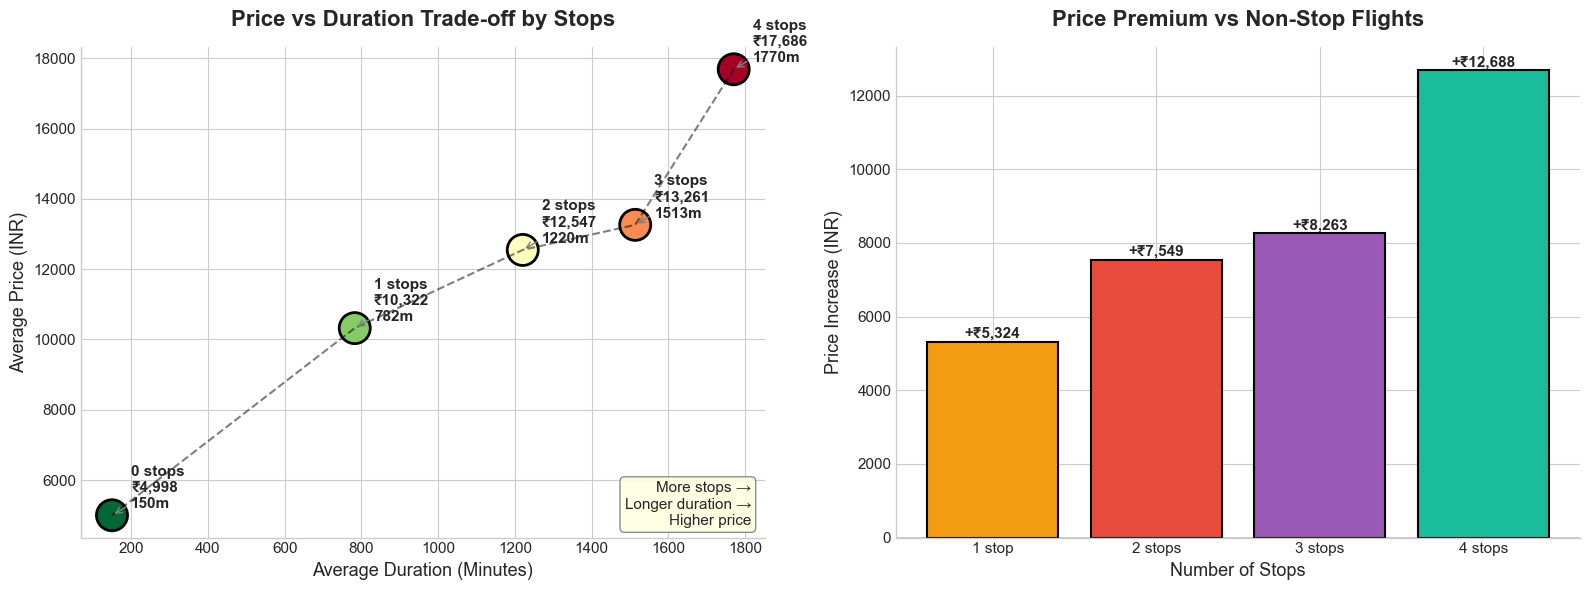

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Price vs Duration Trade-off
ax = axes[0]
stops_list = sorted(df['Stops'].unique())
means = df.groupby('Stops').agg({'Price': 'mean', 'Duration_Minutes': 'mean'})

scatter = ax.scatter(means['Duration_Minutes'], means['Price'], 
                     c=stops_list, cmap='RdYlGn_r', s=500, edgecolors='black', linewidth=2)

# Connect points with line
ax.plot(means['Duration_Minutes'], means['Price'], 'k--', linewidth=1.5, alpha=0.5)

# Annotate each point
for stops in stops_list:
    dur = means.loc[stops, 'Duration_Minutes']
    price = means.loc[stops, 'Price']
    ax.annotate(f'{stops} stops\n₹{price:,.0f}\n{dur:.0f}m', 
                xy=(dur, price), xytext=(dur+50, price+200),
                fontsize=ANNOTATION_SIZE, fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='gray'))

style_axis(ax, 'Price vs Duration Trade-off by Stops', 'Average Duration (Minutes)', 'Average Price (INR)')
add_conclusion_box(ax, "More stops →\nLonger duration →\nHigher price", 'lower right')

# 2. Incremental Cost Analysis
ax = axes[1]
increments = summary['Price_Increase_vs_NonStop'].iloc[1:]
bars = ax.bar(range(len(increments)), increments.values, 
              color=[colors_map.get(s, COLOR_NEUTRAL) for s in increments.index],
              edgecolor='black', linewidth=BAR_EDGE_WIDTH)

ax.set_xticks(range(len(increments)))
ax.set_xticklabels([f'{s} stop{"s" if s > 1 else ""}' for s in increments.index])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'+₹{height:,.0f}', ha='center', fontsize=ANNOTATION_SIZE, fontweight='bold')

style_axis(ax, 'Price Premium vs Non-Stop Flights', 'Number of Stops', 'Price Increase (INR)')
ax.axhline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

In [150]:
# Clean up temporary column
df.drop('Flight_Type', axis=1, inplace=True)

In [151]:
print("="*70)
print("DEEP DIVE CONCLUSIONS: Stops, Duration & Price")
print("="*70)

print("\n1. NON-STOP VS CONNECTING FLIGHTS:")
print(f"   • Non-stop avg price: ₹{non_stop_prices.mean():,.0f}")
print(f"   • Connecting avg price: ₹{connecting_prices.mean():,.0f}")
print(f"   • Connecting costs ₹{connecting_prices.mean() - non_stop_prices.mean():,.0f} MORE")
print(f"   • Difference is statistically significant (p < 0.001)")

print("\n2. STOPS AND DURATION:")
print(f"   • Non-stop avg duration: {non_stop_duration.mean():.0f} minutes")
print(f"   • Connecting avg duration: {connecting_duration.mean():.0f} minutes")
print(f"   • Each stop adds ~{(connecting_duration.mean() - non_stop_duration.mean())/2:.0f} minutes on average")

print("\n3. WHY MORE STOPS = HIGHER PRICE:")
print("   • More stops → Longer flight duration")
print("   • Longer duration → Higher operating costs")
print(f"   • Duration-Price correlation: {df['Duration_Minutes'].corr(df['Price']):.3f}")
print(f"   • Stops-Price correlation: {df['Stops'].corr(df['Price']):.3f}")

print("\n4. RECOMMENDATION:")
print("   • Book non-stop flights when possible - they're CHEAPER")
print("   • If connecting is necessary, 1-stop is better value than 2+ stops")
print("   • Counterintuitive: Non-stop = Faster AND Cheaper")

DEEP DIVE CONCLUSIONS: Stops, Duration & Price

1. NON-STOP VS CONNECTING FLIGHTS:
   • Non-stop avg price: ₹4,998
   • Connecting avg price: ₹10,761
   • Connecting costs ₹5,763 MORE
   • Difference is statistically significant (p < 0.001)

2. STOPS AND DURATION:
   • Non-stop avg duration: 150 minutes
   • Connecting avg duration: 870 minutes
   • Each stop adds ~360 minutes on average

3. WHY MORE STOPS = HIGHER PRICE:
   • More stops → Longer flight duration
   • Longer duration → Higher operating costs
   • Duration-Price correlation: 0.568
   • Stops-Price correlation: 0.665

4. RECOMMENDATION:
   • Book non-stop flights when possible - they're CHEAPER
   • If connecting is necessary, 1-stop is better value than 2+ stops
   • Counterintuitive: Non-stop = Faster AND Cheaper


---
## 3.5 Correlation Matrix

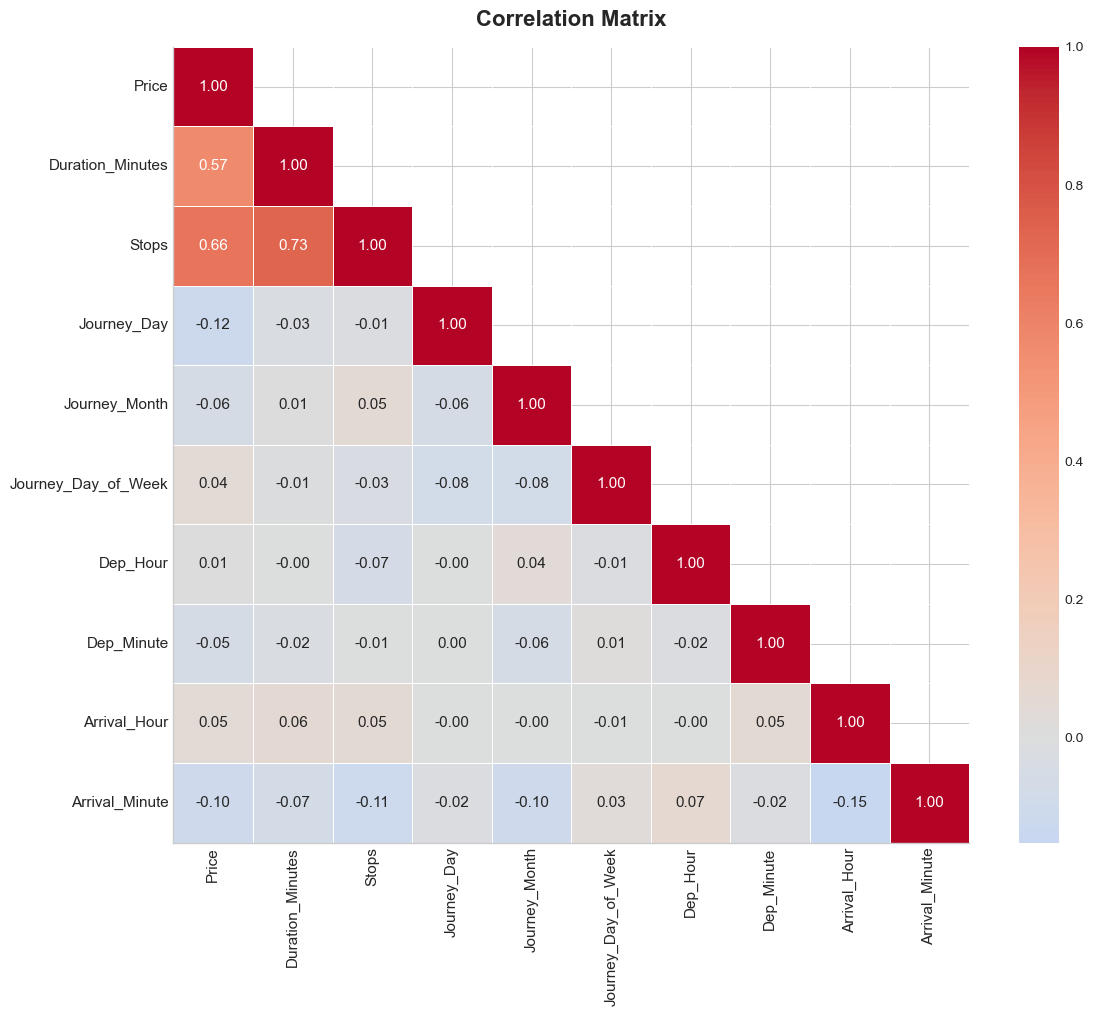

In [152]:
numerical_cols = ['Price', 'Duration_Minutes', 'Stops', 'Journey_Day', 'Journey_Month',
                  'Journey_Day_of_Week', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute']

correlation_matrix = df[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, square=True, ax=ax, annot_kws={'size': ANNOTATION_SIZE})
style_axis(ax, 'Correlation Matrix', '', '')
plt.tight_layout()
plt.show()

In [153]:
price_corr = correlation_matrix['Price'].drop('Price').sort_values(key=abs, ascending=False)

print("CORRELATIONS WITH PRICE:")
for col, corr in price_corr.items():
    strength = 'Strong' if abs(corr) > 0.5 else 'Moderate' if abs(corr) > 0.3 else 'Weak'
    direction = 'Positive' if corr > 0 else 'Negative'
    print(f"   {col}: {corr:.3f} ({strength} {direction})")

CORRELATIONS WITH PRICE:
   Stops: 0.665 (Strong Positive)
   Duration_Minutes: 0.568 (Strong Positive)
   Journey_Day: -0.123 (Weak Negative)
   Arrival_Minute: -0.099 (Weak Negative)
   Journey_Month: -0.061 (Weak Negative)
   Dep_Minute: -0.054 (Weak Negative)
   Arrival_Hour: 0.046 (Weak Positive)
   Journey_Day_of_Week: 0.043 (Weak Positive)
   Dep_Hour: 0.005 (Weak Positive)


---
## 3.6 Phase 3 Summary (Upload This Output)

In [154]:
print("="*70)
print("PHASE 3: ANALYSIS SUMMARY")
print("="*70)

print("\nQ1: HOW DOES NUMBER OF STOPS AFFECT PRICE?")
stops_means = df.groupby('Stops')['Price'].mean()
for stops, price in stops_means.items():
    print(f"   {stops} stops: ₹{price:,.0f}")

print("\nQ2: WHICH AIRLINES ARE PREMIUM VS BUDGET?")
airline_means = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
overall_mean = df['Price'].mean()
premium = [a for a in airline_means.index if airline_means[a] > overall_mean]
budget = [a for a in airline_means.index if airline_means[a] <= overall_mean]
print(f"   Premium ({len(premium)}): {', '.join(premium[:3])}...")
print(f"   Budget ({len(budget)}): {', '.join(budget[:3])}...")

print("\nQ3: DURATION VS PRICE RELATIONSHIP?")
corr = df['Duration_Minutes'].corr(df['Price'])
print(f"   Correlation: {corr:.3f} (Moderate Positive)")

print("\nQ4: DEPARTURE TIME VS PRICE?")
df['Dep_Time_Bucket'] = df['Dep_Hour'].apply(get_time_bucket)
time_means = df.groupby('Dep_Time_Bucket')['Price'].mean()
print(f"   Cheapest: {time_means.idxmin().split('. ')[1]} (₹{time_means.min():,.0f})")
print(f"   Expensive: {time_means.idxmax().split('. ')[1]} (₹{time_means.max():,.0f})")
df.drop('Dep_Time_Bucket', axis=1, inplace=True)

print("\nQ5: WHICH ROUTES ARE MOST/LEAST EXPENSIVE?")
route_means = df.groupby('Route_Pair')['Price'].mean().sort_values(ascending=False)
print(f"   Most Expensive: {route_means.index[0].replace('_', ' → ')} (₹{route_means.iloc[0]:,.0f})")
print(f"   Cheapest: {route_means.index[-1].replace('_', ' → ')} (₹{route_means.iloc[-1]:,.0f})")

print("\nQ6: DOES DAY OF WEEK AFFECT PRICE?")
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_means = df.groupby('Journey_Day_of_Week')['Price'].mean()
print(f"   Cheapest: {day_names[day_means.idxmin()]} (₹{day_means.min():,.0f})")
print(f"   Expensive: {day_names[day_means.idxmax()]} (₹{day_means.max():,.0f})")

print("\nQ7: DOES MONTH AFFECT PRICE?")
month_names = {3: 'March', 4: 'April', 5: 'May', 6: 'June'}
month_means = df.groupby('Journey_Month')['Price'].mean()
print(f"   Cheapest: {month_names[month_means.idxmin()]} (₹{month_means.min():,.0f})")
print(f"   Expensive: {month_names[month_means.idxmax()]} (₹{month_means.max():,.0f})")

print("\nQ8: BEST VALUE FOR NON-STOP FLIGHTS?")
non_stop = df[df['Stops'] == 0]
nonstop_means = non_stop.groupby('Airline')['Price'].agg(['mean', 'count'])
valid = nonstop_means[nonstop_means['count'] > 10]
if len(valid) > 0:
    best_value = valid['mean'].idxmin()
    print(f"   Best Value: {best_value} (₹{valid.loc[best_value, 'mean']:,.0f} avg)")

print("\n" + "="*70)
print("DEEP DIVE: STOPS, DURATION & PRICE RELATIONSHIP")
print("="*70)

print("\nNON-STOP VS CONNECTING:")
non_stop_avg = df[df['Stops'] == 0]['Price'].mean()
connecting_avg = df[df['Stops'] > 0]['Price'].mean()
print(f"   Non-stop avg: ₹{non_stop_avg:,.0f}")
print(f"   Connecting avg: ₹{connecting_avg:,.0f}")
print(f"   Connecting costs ₹{connecting_avg - non_stop_avg:,.0f} MORE")

print("\nKEY CORRELATIONS:")
print(f"   Stops vs Price: {df['Stops'].corr(df['Price']):.3f}")
print(f"   Duration vs Price: {df['Duration_Minutes'].corr(df['Price']):.3f}")
print(f"   Stops vs Duration: {df['Stops'].corr(df['Duration_Minutes']):.3f}")

print("\nINSIGHT:")
print("   More stops → Longer duration → Higher price")
print("   Non-stop flights are BOTH faster AND cheaper!")

print("\n" + "="*70)
print("KEY INSIGHTS FOR TRAVELERS")
print("="*70)
print("   1. Book non-stop flights - cheaper AND faster")
print("   2. Choose budget airlines: SpiceJet, GoAir, IndiGo")
print("   3. Book red-eye flights (0-4 AM) for lowest prices")
print("   4. Fly on Friday, avoid Sunday")
print("   5. Travel in April for best deals")
print("   6. Chennai-Kolkata is the cheapest route")
print("="*70)

PHASE 3: ANALYSIS SUMMARY

Q1: HOW DOES NUMBER OF STOPS AFFECT PRICE?
   0 stops: ₹4,998
   1 stops: ₹10,322
   2 stops: ₹12,547
   3 stops: ₹13,261
   4 stops: ₹17,686

Q2: WHICH AIRLINES ARE PREMIUM VS BUDGET?
   Premium (5): Multiple carriers Premium economy, Jet Airways, Multiple carriers...
   Budget (6): Vistara, GoAir, IndiGo...

Q3: DURATION VS PRICE RELATIONSHIP?
   Correlation: 0.568 (Moderate Positive)

Q4: DEPARTURE TIME VS PRICE?
   Cheapest: Red-eye (0-4) (₹7,843)
   Expensive: Morning (8-12) (₹9,330)

Q5: WHICH ROUTES ARE MOST/LEAST EXPENSIVE?
   Most Expensive: Banglore → New Delhi (₹10,417)
   Cheapest: Chennai → Kolkata (₹4,790)

Q6: DOES DAY OF WEEK AFFECT PRICE?
   Cheapest: Friday (₹7,867)
   Expensive: Sunday (₹9,446)

Q7: DOES MONTH AFFECT PRICE?
   Cheapest: April (₹5,767)
   Expensive: March (₹9,983)

Q8: BEST VALUE FOR NON-STOP FLIGHTS?
   Best Value: SpiceJet (₹3,800 avg)

DEEP DIVE: STOPS, DURATION & PRICE RELATIONSHIP

NON-STOP VS CONNECTING:
   Non-stop av